# EDA students academic performance in math.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [2]:
stud_math = pd.read_csv('stud_math.csv')

## Initial data inspection

In [3]:
stud_math.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
# Checking duplicates in dataframe.
stud_math.loc[stud_math.duplicated() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


## Preprocessing

In [6]:
# 1. Make a pattern of primary look on columns in dataframe (info, counts and so on).


def get_describe(column):

    display(stud_math[column].value_counts())
    display(stud_math[column].describe())
    nul = stud_math[column].isna().sum()
    mode = stud_math[column].mode()[0]
    unique = stud_math[column].nunique()

    print('Уникальных значений:  {},'.format(unique), 'Чаще всего встречается значение: {},'.format(mode),
          'Пустых значений: {}'.format(nul))

# 2. Create function to get outliers from quantitative variables distribution.


def get_outliers(column):

    Q1 = stud_math[column].quantile(q=0.25, interpolation='midpoint')
    Q3 = stud_math[column].quantile(q=0.75, interpolation='midpoint')
    IQR = Q3 - Q1
    W1 = stud_math[stud_math[column] < Q1 -
                   1.5*IQR][column]  # bottom outlier series
    W3 = stud_math[stud_math[column] > Q3 +
                   1.5*IQR][column]  # upper outlier series

    if (len(W1.value_counts()) == 0) & (len(W3.value_counts()) == 0):
        print('There is no outliers')
    elif len(W1.value_counts()) > 0:
        print('There are bottom outliers:', W1.values)
    elif len(W3.value_counts()) > 0:
        print('There are upper outliers:', W3.values)


# 3. Create function to check Chi2 method between category variables.
# df = dataframe, col1,col2 = columns which we want to get dependence, alpha = level of method,
# all_rel = 1 - we want to see all H0 and H1 relations, 0 - to see only H1 dependent.

def get_chi2(df, col1, col2, alpha, all_rel):

    # First make a pivot table with needed variables.
    pivot = df.pivot_table(values=['score'], index=[col1], columns=[col2],
                           aggfunc='count', fill_value=0)

    # Method Chi2: H0 - variables are independent. H1 - variables are dependent.
    # We need to fill list of lists - chi2_list, from pivot above.

    row_num = df[col1].nunique()
    col_num = df[col2].nunique()
    chi2_list = []
    pivot_val = 0

    for i in range(0, row_num):
        row_list = []
        for j in range(0, col_num):
            try:
                # pivot.iat extract one value from each position in out pivot table.
                pivot_val = pivot.iat[i, j]
            except:
                pivot_val = -99
                print("\n В признаке {} при индексах {}, {} возникает следующая ошибка: ".format(col2, i, j),
                      sys.exc_info()[1])
            if pivot_val != -99:
                row_list.append(pivot_val)

        chi2_list.append(row_list)

    # Getting parameters of Chi2- method and checking the hypothesis.

    stat, p, dof, expected = chi2_contingency(chi2_list)

    if all_rel == 1:
        display(pivot)
        if p <= alpha:
            print("p value is " + str(p))
            print('Зависимы (H1 true)')
        else:
            print("p value is " + str(p))
            print('Независимы (H0 true)')
    elif all_rel == 0:
        if p <= alpha:
            display(pivot)
            print("p value is " + str(p))
            print('Зависимы (H1 true)')

# 4. Create function to check current column on relation
# with all other category columns in dataframe with Chi2-method.


def get_relation(df, column, all_rel):

    df_cat = df.drop(['age', 'absences', 'score', column], axis=1)

    for col in df_cat.columns:
        get_chi2(df, column, col, 0.05, all_rel)


# 5. Create function of getting boxplots, where y='score', x='current column'

def get_boxplot(df, column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# 6. Create function of checking T-test.

def get_ttest(df, column):
    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        p_test = ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                           df.loc[df.loc[:, column] == comb[1], 'score']).pvalue
        if p_test <= 0.05/len(combinations_all):
            print('p_value = {}'.format(p_test * len(combinations_all)))
            print('Найдены статистически значимые различия для столбца', column)
            break

## Primary columns analysis

### Количественные переменные

#### Age

In [7]:
get_describe('age')

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Уникальных значений:  8, Чаще всего встречается значение: 16, Пустых значений: 0


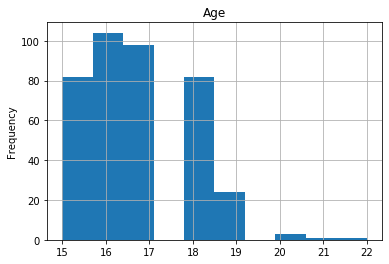

In [8]:
stud_math.age.plot(kind='hist', grid=True, title='Age')

Из гистограммы видно, что есть выбросы, найдем их более точно с помощью функции нахождения выбросов (из блока предобработки):

In [9]:
get_outliers('age')

There are upper outliers: [22]


Итак, уникальных значений возрастов 8, из которых самый встречающийся это 16 лет. Очень малое количество студентов от 20 до 22х лет, скорее всего это второгодки, кто не может сдать экзамен (проверим это дальше). Исходя их метода интерквартильного расстояния имеется один выброс в 22 года, но по здравому смыслу это никак не помешает дальнейшему исследованию, тем более, что разница от предыдущего возраста всего 1 год (если было бы 50 лет, мы бы выкинули его из статистики).

#### Absences

In [10]:
get_describe('absences')

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Уникальных значений:  36, Чаще всего встречается значение: 0.0, Пустых значений: 12


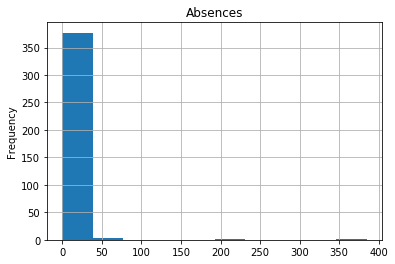

In [11]:
stud_math.absences.plot(kind='hist', grid=True, title='Absences')

Всего 36 уникальных значений пропусков школы. Имеется 12 незаполненных значений. 
По гистограмме мы видим, что есть большие выбросы в 385 и 212 дней.
Школьных календарных дней не более 180, поэтому два значения в 385 и 212 нужно точно исключить или заменить.
Проверим с помощью функции какие точно получаются выбросы:

In [12]:
get_outliers('absences')

There are upper outliers: [ 25.  54.  26.  56.  24.  28.  22. 385.  21.  75.  22.  30.  38.  22.
  40.  23. 212.]


По формуле интерквартильного расстояния у нас верхние выбросы начинатся с 21, просто потому что самое большое число студентов не пропускали занятия (0 встречается 111 раз). По здравому смыслу мы не будем убирать все данные, кроме тех, что противоречат логике - это 212 и 385. Посмотрим строки датафрейма, где находятся эти два значения. Заменим 212 и 385 на медиану, так как среднее искажено в большую сторону из-за этих двух значений.

In [13]:
stud_math.loc[(stud_math.absences == 212) | (stud_math.absences == 385)][['reason', 'traveltime', 'studytime', 
                                                                          'failures','schoolsup', 'paid', 
                                                                          'activities', 'higher', 'romantic', 
                                                                          'famrel', 'freetime', 'goout',
                                                                          'Medu', 'Fedu', 'health',
                                                                          'Pstatus', 'absences', 'score']]

,reason,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,goout,Medu,Fedu,health,Pstatus,absences,score
222,other,1.0,2.0,0.0,yes,no,no,yes,no,2.0,3.0,1.0,2.0,3.0,3.0,T,385.0,85.0
390,course,1.0,2.0,2.0,no,yes,no,yes,no,5.0,5.0,4.0,2.0,2.0,4.0,A,212.0,45.0


Сравним различающиеся показатели этих обоих учеников:

- Ученик 222 судя по данным учится очень хорошо (оценка 85 баллов) с поддержкой школы, но без платных услуг, возможно он один из лучших учеников - стипендиатов, не выходит гулять с друзьями (goout=1), поэтому заменим пропуски занятий на 0. Возможно просто кто-то пошутил, занося такое большое количество пропусков (завистливые одноклассники).

- Ученик 390 имеет 2 промаха (failures), без поддержки школы, но платит за доп мат занятия, родители в разводе, много гуляет (goout=4), оценка по мат-ке меньше среднего (45 баллов) и то за счет доп занятий скорее всего, поэтому заменим его кол-во пропусков на 21. Скорее всего допустили ошибку в указании данных (лишняя двойка в конце), при этому 21 это больше среднего значения, но не намного (как максимальное 75 из остальных имеющихся) - делаем таким образом сглаживание.

In [14]:
stud_math.absences = stud_math.absences.replace(385, 0)
stud_math.absences = stud_math.absences.replace(212, 21)

count    383.000000
mean       5.775457
std        8.110282
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

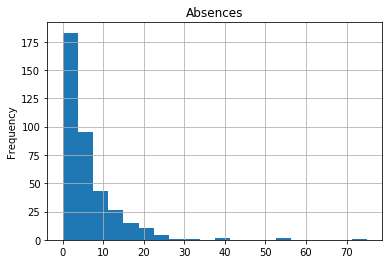

In [15]:
# Проверяем изменения.
stud_math.absences.plot(kind='hist', grid=True, bins=20, title='Absences')
stud_math.absences.describe()

Посмотрим строки, где в столбце absence стоят пропуски:

In [16]:
stud_math.iloc[np.where(pd.isnull(stud_math.absences))][['age', 'reason', 'traveltime', 'studytime', 'failures',
                                                        'schoolsup', 'paid', 'activities', 'higher', 
                                                        'romantic', 'famrel', 'freetime', 'goout',
                                                        'Medu', 'Fedu', 'Pstatus', 'health', 'score']]

,age,reason,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,goout,Medu,Fedu,Pstatus,health,score
24,15,course,1.0,3.0,0.0,yes,yes,yes,yes,no,4.0,3.0,2.0,2.0,4.0,T,5.0,40.0
101,16,other,1.0,3.0,0.0,no,no,yes,yes,yes,4.0,4.0,3.0,4.0,4.0,T,4.0,85.0
120,15,course,1.0,2.0,0.0,no,no,no,yes,no,3.0,2.0,3.0,1.0,2.0,T,1.0,75.0
129,16,course,1.0,NaN,0.0,no,yes,yes,yes,no,3.0,5.0,5.0,4.0,4.0,T,4.0,90.0
150,18,course,1.0,1.0,3.0,no,no,no,no,yes,2.0,3.0,5.0,1.0,1.0,T,4.0,0.0
172,17,reputation,1.0,2.0,0.0,no,yes,yes,yes,no,4.0,4.0,4.0,4.0,4.0,T,5.0,50.0
215,17,reputation,2.0,2.0,0.0,no,NaN,no,yes,no,4.0,4.0,4.0,3.0,2.0,T,1.0,75.0
227,17,reputation,1.0,NaN,0.0,no,yes,no,NaN,no,5.0,3.0,3.0,2.0,3.0,NaN,3.0,60.0
254,17,course,1.0,1.0,0.0,no,no,no,yes,no,4.0,4.0,2.0,2.0,1.0,T,5.0,60.0
265,18,reputation,2.0,2.0,0.0,no,yes,yes,yes,no,4.0,2.0,5.0,3.0,4.0,NaN,1.0,85.0


Сравним показатели этих учеников:

- Ученик 150 сразу бросается в глаза с нулевой оценкой по мат-ке: он мало учится, много гуляет, имеет 3 промаха, без поддержки, не хочет иметь высшее образование, имеет романтичесике отношения, родители с начальным образованием - по всем показателям он ярый прогульщик. Заменим его absence на max=75 и посмотрим на учеников с самыми большими пропусками.

In [17]:
stud_math.loc[150, 'absences'] = 75
stud_math.loc[stud_math.absences == 75][['age', 'reason', 'traveltime', 'studytime', 'failures',
                                         'schoolsup', 'paid', 'activities', 'higher',
                                         'romantic', 'famrel', 'freetime', 'goout',
                                         'Medu', 'Fedu', 'Pstatus', 'health', 'score']]

,age,reason,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,goout,Medu,Fedu,Pstatus,health,score
150,18,course,1.0,1.0,3.0,no,no,no,no,yes,2.0,3.0,5.0,1.0,1.0,T,4.0,0.0
276,18,home,2.0,2.0,0.0,no,no,no,no,yes,NaN,1.0,1.0,3.0,2.0,A,5.0,45.0


Можем видеть сходства: во времени на образование, отсутствие доп курсов и тп. Оставляем.

Следующий ученик, который бросается в глаза это тот, у кого не проставлена оценка за экзамен по мат-ке.

- Ученик 270: судя по тому,что он не особо много тратит времени на учебу, ходит гулять, имеет хорошее здоровье и activities, есть промахи (2), скорее всего он физически активен и возможно попадал в драки. Родители окончили школу, но хотят, чтобы ребенок все-таки поступил в университет (уже 19 лет, возможно оставался на 2й год), оплатили курсы по мат-ке. Так что score у него скорее всего ниже среднего, а absences выше среднего - заменим на 75%квартиль.

In [18]:
stud_math.loc[270, 'absences'] = stud_math.absences.quantile(0.75)

Посмотрим на пропуски занятий тех учеников, у кого оценка меньше средней, но больше 40 (в нашей выборке это минимальное значение score):

In [19]:
stud_math.loc[stud_math.score.between(40, stud_math.score.mean())]['absences'].value_counts()

0.0     21
4.0     19
2.0     18
8.0     10
10.0     7
6.0      7
14.0     4
12.0     4
15.0     2
21.0     1
20.0     1
56.0     1
28.0     1
5.0      1
3.0      1
16.0     1
75.0     1
22.0     1
30.0     1
19.0     1
38.0     1
18.0     1
9.0      1
7.0      1
17.0     1
13.0     1
Name: absences, dtype: int64

count    109.000000
mean       7.660550
std       10.610285
min        0.000000
25%        2.000000
50%        4.000000
75%       10.000000
max       75.000000
Name: absences, dtype: float64

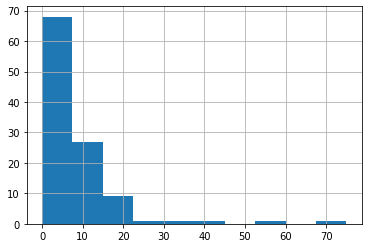

In [20]:
stud_math.loc[stud_math.score.between(
    40, stud_math.score.mean())]['absences'].hist()
stud_math.loc[stud_math.score.between(
    40, stud_math.score.mean())]['absences'].describe()

Среднее значение пропусков 7.66, округляем и заменяем на 8 (строки 24, 172, 352):

In [21]:
stud_math.loc[[24, 172, 352], 'absences'] = 8

Теперь посмотрим на оставшихся учеников, у кого score выше среднего и до 90 (в нашей выборке это максимальное значени). Посмотрим на их пропуски занятий:

In [22]:
stud_math.loc[stud_math.score.between(
    stud_math.score.mean(), 90)]['absences'].value_counts()

0.0     50
2.0     39
4.0     27
6.0     18
10.0     8
8.0      8
12.0     7
3.0      5
14.0     5
7.0      4
16.0     4
1.0      3
20.0     3
11.0     2
9.0      2
40.0     1
22.0     1
5.0      1
21.0     1
54.0     1
18.0     1
23.0     1
24.0     1
13.0     1
25.0     1
Name: absences, dtype: int64

count    195.000000
mean       5.369231
std        6.988730
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       54.000000
Name: absences, dtype: float64

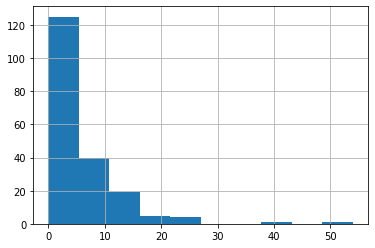

In [23]:
stud_math.loc[stud_math.score.between(
    stud_math.score.mean(), 90)]['absences'].hist()
stud_math.loc[stud_math.score.between(
    stud_math.score.mean(), 90)]['absences'].describe()

Среднее 5.36, но в этом случае более хороших оценок по математике можно взять и медиану - 4 пропуска. Заменим наши оставшиеся пустые значения на медиану:

In [24]:
stud_math.loc[[101, 120, 129, 215, 227, 254, 265], 'absences'] = stud_math.absences.median()

Проверим не пропустили ли мы какую-либо замену, не остались ли пустые значения в столбце absence:

In [25]:
stud_math.iloc[np.where(pd.isnull(stud_math.absences))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


Пустых значений не осталось, посмотрим теперь на итоговые исправленные данные absence:

count    395.000000
mean       5.941772
std        8.718622
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

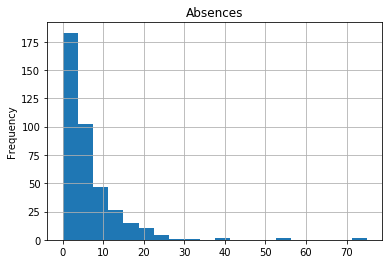

In [26]:
stud_math.absences.plot(kind='hist', grid=True, bins=20, title='Absences')
stud_math.absences.describe()

#### Score

In [27]:
get_describe('score')

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Уникальных значений:  18, Чаще всего встречается значение: 50.0, Пустых значений: 6


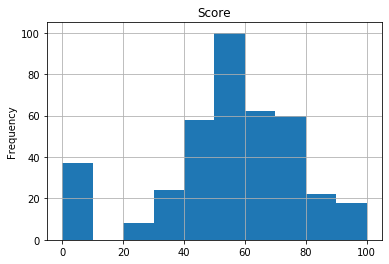

In [28]:
stud_math.score.plot(kind='hist', grid=True, title='Score')

Score - оценка за экзамен по математике по 100 бальной шкале (как видим из значений). Всего уникальных оценок 18. Пустых значений 6. Самая распространенная это 50 баллов. Смущает, что достаточно много оценок равных 0 - 37 человек, либо это ученики не пришедшие на экзамен вовсе или сдавшие пустой бланк (по разным причинам: от здоровья, что-то случилось в семье, просто не хотят сдавать или поступать в высшее уч. заведение), либо не решившие ни одного задания. На этих учеников можно посмотреть отдельно - они кажутся выбросами, проверим это функцией нахождения выбросов.

In [29]:
get_outliers('score')

There is no outliers


Выбросов не оказалось, значит оставляем все значения как есть. Давайте посмотрим на датафрейм нулевых оценок:

In [30]:
stud_math.loc[stud_math.score == 0][['reason', 'traveltime', 'studytime', 'failures',
                                     'schoolsup', 'paid', 'activities', 'higher',
                                     'romantic', 'famrel', 'freetime', 'goout',
                                     'Medu', 'Fedu', 'health', 'absences', 'score']][:15]

,reason,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,goout,Medu,Fedu,health,absences,score
128,reputation,1.0,1.0,2.0,no,no,yes,yes,no,3.0,3.0,3.0,2.0,2.0,4.0,0.0,0.0
130,course,2.0,3.0,2.0,no,no,no,yes,yes,4.0,2.0,2.0,3.0,4.0,5.0,0.0,0.0
131,course,3.0,1.0,0.0,no,no,yes,yes,yes,4.0,NaN,3.0,1.0,1.0,4.0,0.0,0.0
134,course,NaN,2.0,0.0,no,no,no,yes,yes,5.0,3.0,3.0,3.0,4.0,5.0,0.0,0.0
135,course,1.0,3.0,0.0,no,no,yes,yes,yes,4.0,3.0,3.0,4.0,4.0,5.0,0.0,0.0
136,course,3.0,2.0,0.0,no,NaN,no,yes,no,NaN,4.0,5.0,3.0,4.0,5.0,0.0,0.0
137,NaN,NaN,1.0,2.0,no,no,yes,yes,yes,4.0,3.0,2.0,3.0,NaN,5.0,0.0,0.0
140,NaN,2.0,4.0,0.0,yes,no,NaN,yes,no,2.0,2.0,2.0,4.0,3.0,3.0,0.0,0.0
144,home,1.0,1.0,3.0,no,no,no,yes,no,5.0,4.0,5.0,2.0,1.0,5.0,0.0,0.0
146,home,1.0,2.0,3.0,no,no,no,yes,no,3.0,3.0,2.0,3.0,2.0,3.0,0.0,0.0


У всех учеников с нулевыми оценками число прогулов уроков тоже равно 0 (за исключением одного значения, которое мы заменили выше на 75). Это кажется не логичным. Когда заполним пропуски по остальным столбцам, будем смотреть зависимости, имея в виду, что у нас есть 37 таких строчек.

Теперь посмотрим на пустые значения score:

In [31]:
stud_math.iloc[np.where(pd.isnull(stud_math.score))][['reason', 'traveltime', 'studytime', 'failures',
                                                      'schoolsup', 'paid', 'activities', 'higher',
                                                      'romantic', 'famrel', 'freetime', 'goout',
                                                      'Medu', 'Fedu', 'Pstatus', 'health', 'absences']]

,reason,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,goout,Medu,Fedu,Pstatus,health,absences
201,reputation,1.0,2.0,0.0,yes,NaN,yes,yes,no,4.0,NaN,3.0,2.0,3.0,T,4.0,6.0
244,course,2.0,3.0,0.0,no,yes,no,yes,yes,4.0,4.0,4.0,2.0,1.0,T,3.0,0.0
270,home,1.0,2.0,2.0,no,yes,yes,yes,no,4.0,3.0,5.0,3.0,3.0,T,5.0,8.0
283,home,2.0,2.0,0.0,yes,no,yes,yes,no,5.0,NaN,4.0,1.0,1.0,T,4.0,4.0
312,course,1.0,2.0,1.0,no,no,no,yes,no,4.0,5.0,NaN,1.0,2.0,T,4.0,3.0
350,home,3.0,2.0,3.0,no,no,no,yes,no,5.0,4.0,4.0,1.0,1.0,T,2.0,8.0


Исходя из данных этой выборки, ничего особо не выделяется. Но проверим влияет ли failure на оценку по математике с помощью гистограммы распределения, возьмем failure от 1 до 3.

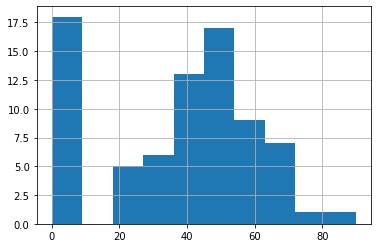

In [32]:
stud_math.loc[stud_math.failures.between(1,3)].score.hist()

Критерий failure имеет такое же распределение как и общее score, где среднее~медиане одинаково. Значит заполним все непустые значения score значениями медианы:

In [33]:
stud_math.score.fillna(stud_math.score.median(), inplace=True)

Проверим, остались ли пустые значенися в score:

In [34]:
stud_math.iloc[np.where(pd.isnull(stud_math.score))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


Посмотрим на итоговые данные в столбце score:

count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

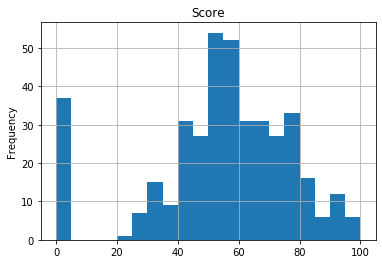

In [35]:
stud_math.score.plot(kind='hist', grid=True, bins=20, title='Score')
stud_math.score.describe()

#### Studytime, granular

In [36]:
get_describe('studytime, granular')

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

count    388.000000
mean      -6.115979
std        2.526235
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

Уникальных значений:  4, Чаще всего встречается значение: -6.0, Пустых значений: 7


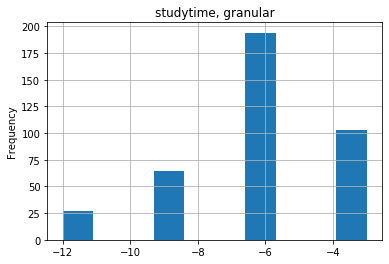

In [37]:
stud_math['studytime, granular'].plot(
    kind='hist', grid=True, title='studytime, granular')

Посмотрим на таблицу с двумя столбцами вместе studytime и studytime, granular. Возможно они зависимы.

In [38]:
stud_math[['studytime, granular', 'studytime']].head()

,"studytime, granular",studytime
0,-6.0,2.0
1,-6.0,2.0
2,-6.0,2.0
3,-9.0,3.0
4,-6.0,2.0


Как видно, столбец studytime, granular есть столбец studytime умноженный на -3. Проверим корреляцию:

In [39]:
stud_math[['studytime, granular', 'studytime']].corr()

,"studytime, granular",studytime
"studytime, granular",1.0,-1.0
studytime,-1.0,1.0


Корреляция = -1, поэтому можем смело убирать столбец из датафрейма:

In [40]:
stud_math = stud_math.drop(columns='studytime, granular')

### Корреляция между числовыми признаками

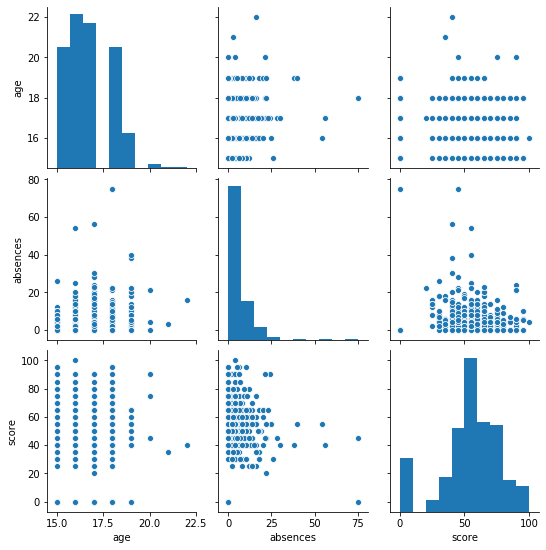

In [41]:
# Make new dataframe only with quantitative columns.
stud_math_num = stud_math[['age', 'absences', 'score']]
sns.pairplot(stud_math_num)

In [42]:
stud_math_num.corr()

,age,absences,score
age,1.000000,0.182967,-0.151150
absences,0.182967,1.000000,-0.026646
score,-0.151150,-0.026646,1.000000


Построим тепловую карту распределения:

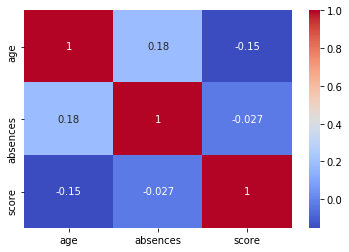

In [43]:
sns.heatmap(stud_math_num.corr(), annot=True, cmap='coolwarm')

#### Выводы: 

Mы видим слабую корреляцию между количественными переменными. Можно наблюдать только, что пропусков занятий становится чуть больше с возрастом (появляются романтические отношения или иные цели в жизни). Пропуски занятий же практически не зависят от оценки, но судя по графикам все равно есть значения, где пропуски больше, тем оценка ниже.

Посмотрим теперь корреляцию, если бы мы убрали оценки равные 0 из датафрейма.

In [44]:
score_notnull = stud_math.loc[stud_math.score != 0]
score_notnull_num = score_notnull[['age', 'absences', 'score']]
score_notnull_num.corr()

,age,absences,score
age,1.000000,0.212960,-0.132544
absences,0.212960,1.000000,-0.222684
score,-0.132544,-0.222684,1.000000


Теперь корреляция стала более явной у absences и score = -0.22: чем больше пропусков, тем ниже оценка. Это больше похоже на правду.

### Номинативные переменные

#### School

In [45]:
get_describe('school')

GP    349
MS     46
Name: school, dtype: int64

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: GP, Пустых значений: 0


#### Sex

In [46]:
get_describe('sex')

F    208
M    187
Name: sex, dtype: int64

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: F, Пустых значений: 0


#### Address

In [47]:
get_describe('address')

U    295
R     83
Name: address, dtype: int64

count     378
unique      2
top         U
freq      295
Name: address, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: U, Пустых значений: 17


Проверим взаимосвязь address с другими параметрами:

In [48]:
get_relation(stud_math, 'address', 0)

score    
school     GP  MS
address          
R          60  23
U         277  18

p value is 6.929573879811974e-08
Зависимы (H1 true)


score                 
Medu      0.0 1.0 2.0 3.0  4.0
address                       
R           0  20  23  23   16
U           3  37  74  72  108

p value is 0.011153275168306586
Зависимы (H1 true)


score                              
Mjob    at_home health other services teacher
address                                      
R            22      3    30       15      10
U            35     26    95       80      43

p value is 0.007204822781038289
Зависимы (H1 true)


score                      
reason  course home other reputation
address                             
R           33   11    10         28
U           99   85    23         72

p value is 0.018606390762429505
Зависимы (H1 true)


score            
traveltime   1.0 2.0 3.0 4.0
address                     
R             34  26  12   4
U            200  65   9   3

p value is 1.0950791655202227e-06
Зависимы (H1 true)


score            
failures   0.0 1.0 2.0 3.0
address                   
R           53  15   6   3
U          229  31   8  11

p value is 0.0396543674116246
Зависимы (H1 true)


score     
internet    no  yes
address            
R           23   54
U           31  237

p value is 0.00020088072525348738
Зависимы (H1 true)


Самая проглядывающая зависимость c traveltime. Давайте заменим на U, где traveltime=1,2, на R, где traveltime=3,4.

In [49]:
# Create dataframe with nan address and traveltime.
df_ad = stud_math.iloc[np.where(pd.isnull(stud_math.address))][[
    'address', 'traveltime']]
df_ad_keys = df_ad['address'].keys()  # Extract indexes.
display(df_ad_keys)

travel_val = df_ad['traveltime'].values
l = len(df_ad_keys)

for i in range(0, l):
    if (travel_val[i] == 1) | (travel_val[i] == 2):
        stud_math.loc[df_ad_keys[i], 'address'] = 'U'
    elif (travel_val[i] == 3) | (travel_val[i] == 4):
        stud_math.loc[df_ad_keys[i], 'address'] = 'R'

Int64Index([6, 52, 75, 92, 96, 159, 168, 241, 254, 270, 292, 348, 350, 354,
            359, 372, 376],
           dtype='int64')

In [50]:
# Checking nan address values.
stud_math.iloc[np.where(pd.isnull(stud_math.address))][['school', 'reason', 'traveltime', 'studytime',
                                                        'schoolsup', 'paid', 'activities', 'higher',
                                                        'romantic', 'famrel', 'freetime', 'Medu',
                                                        'Fedu', 'Mjob', 'health', 'absences', 'score']]

,school,reason,traveltime,studytime,schoolsup,paid,activities,higher,romantic,famrel,freetime,Medu,Fedu,Mjob,health,absences,score
241,GP,course,NaN,2.0,no,yes,no,yes,no,3.0,3.0,4.0,4.0,teacher,4.0,2.0,60.0
348,GP,reputation,NaN,3.0,no,yes,yes,yes,yes,NaN,4.0,4.0,3.0,health,4.0,0.0,75.0
372,MS,home,NaN,3.0,no,no,yes,yes,NaN,3.0,4.0,2.0,2.0,other,3.0,8.0,55.0


Мы видим, что Medu = 4, тогда address = U. У третьего студента Medu=2, тоже U. Заменим:

In [51]:
stud_math.address.fillna('U', inplace=True)

#### Famsize - family size

In [52]:
get_describe('famsize')

GT3    261
LE3    107
Name: famsize, dtype: int64

count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: GT3, Пустых значений: 27


Посмотрим, с какими столбцами есть взаимосвязь у famsize с помощью функции из предобработки:

In [53]:
get_relation(stud_math, 'famsize', 0)

score             
studytime   1.0  2.0 3.0 4.0
famsize                     
GT3          65  120  53  18
LE3          30   61   7   8

p value is 0.011899582012288476
Зависимы (H1 true)


score     
famsup     no  yes
famsize           
GT3        82  158
LE3        45   50

p value is 0.03401178239329615
Зависимы (H1 true)


Как мы видим из таблиц связей, в каждом столбце модой является GT3. Заполним пропуски этим значением:

In [54]:
stud_math.famsize.fillna('GT3', inplace=True)

#### Medu, Fedu - mother and father education

In [55]:
get_describe('Medu')
get_describe('Fedu')

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Уникальных значений:  5, Чаще всего встречается значение: 4.0, Пустых значений: 3


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

Уникальных значений:  6, Чаще всего встречается значение: 2.0, Пустых значений: 24


Значение 40 в Fedu явно ошибка, должно быть 4, исправим:

In [56]:
stud_math.Fedu = stud_math.Fedu.replace(40, 4)

Посмотрим на пустые значения в образовании матери и отца:

In [57]:
# Nan value in Mother education.
stud_math.iloc[np.where(pd.isnull(stud_math.Medu))][['reason', 'traveltime', 'studytime', 'failures',
                                                     'schoolsup', 'paid', 'activities', 'higher',
                                                     'romantic', 'famrel', 'freetime', 'goout',
                                                     'Fedu', 'nursery', 'health', 'absences', 'score']]

,reason,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,goout,Fedu,nursery,health,absences,score
92,home,1.0,2.0,0.0,yes,no,no,yes,no,3.0,3.0,NaN,1.0,yes,2.0,4.0,30.0
193,reputation,1.0,1.0,0.0,no,no,yes,yes,no,4.0,3.0,2.0,3.0,yes,5.0,8.0,50.0
239,reputation,1.0,2.0,1.0,no,no,no,no,NaN,5.0,5.0,4.0,2.0,yes,2.0,0.0,0.0


In [58]:
# Nan value in Father education.
stud_math.iloc[np.where(pd.isnull(stud_math.Fedu))][['reason', 'traveltime', 'studytime', 'failures',
                                                     'schoolsup', 'paid', 'activities', 'higher',
                                                     'romantic', 'famrel', 'freetime', 'goout',
                                                     'Medu', 'nursery', 'health', 'absences', 'score']][:10]

,reason,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,goout,Medu,nursery,health,absences,score
21,other,1.0,1.0,NaN,no,NaN,no,yes,no,5.0,4.0,2.0,4.0,yes,5.0,0.0,75.0
42,course,1.0,2.0,0.0,no,no,yes,yes,no,4.0,3.0,3.0,4.0,yes,5.0,2.0,90.0
46,home,1.0,2.0,0.0,no,no,no,yes,no,2.0,3.0,5.0,3.0,yes,3.0,12.0,55.0
57,reputation,1.0,2.0,0.0,no,NaN,yes,yes,no,3.0,2.0,2.0,4.0,yes,5.0,4.0,75.0
58,home,1.0,2.0,0.0,yes,no,yes,yes,no,4.0,3.0,2.0,1.0,yes,5.0,2.0,45.0
67,course,1.0,4.0,0.0,yes,yes,no,yes,NaN,4.0,3.0,3.0,3.0,yes,5.0,4.0,30.0
137,NaN,NaN,1.0,2.0,no,no,yes,yes,yes,4.0,3.0,2.0,3.0,no,5.0,0.0,0.0
142,course,NaN,3.0,0.0,no,yes,yes,NaN,no,4.0,2.0,2.0,4.0,yes,5.0,2.0,55.0
159,course,1.0,2.0,1.0,no,yes,no,yes,yes,4.0,5.0,5.0,3.0,yes,5.0,4.0,60.0
161,course,2.0,2.0,2.0,yes,no,no,yes,yes,4.0,4.0,4.0,3.0,yes,3.0,6.0,35.0


Если есть зависимость между образованиями родителей, возможно нам удастся заполнить пропуски. Проверим, есть ли зависимости у столбцов образований родителей с другими, построим на примере Medu:

In [59]:
get_relation(stud_math, 'Medu', 0)

score    
school    GP  MS
Medu            
0.0        3   0
1.0       42  17
2.0       95   7
3.0       86  11
4.0      120  11

p value is 0.0003508776355664648
Зависимы (H1 true)


score     
address     R    U
Medu              
0.0         0    3
1.0        21   38
2.0        23   79
3.0        23   74
4.0        16  115

p value is 0.004812705964316291
Зависимы (H1 true)


score     
Pstatus     A    T
Medu              
0.0         0    3
1.0         1   51
2.0         6   84
3.0        14   69
4.0        15  106

p value is 0.040137700722493584
Зависимы (H1 true)


score                
Fedu   0.0 1.0 2.0 3.0 4.0
Medu                      
0.0      0   1   2   0   0
1.0      1  36  13   5   1
2.0      0  27  47  17   7
3.0      0  13  25  34  18
4.0      1   0  18  39  63

p value is 5.87821301356702e-31
Зависимы (H1 true)


score                              
Mjob at_home health other services teacher
Medu                                      
0.0        2      0     1        0       0
1.0       25      1    26        5       0
2.0       21      2    45       30       0
3.0        8      5    37       38       3
4.0        2     24    22       24      52

p value is 8.500271239807765e-36
Зависимы (H1 true)


score                              
Fjob at_home health other services teacher
Medu                                      
0.0        1      0     2        0       0
1.0        4      1    29       19       1
2.0        6      4    58       25       1
3.0        1      3    55       26       2
4.0        4      7    52       30      25

p value is 3.1676373116461035e-06
Зависимы (H1 true)


score            
failures   0.0 1.0 2.0 3.0
Medu                      
0.0          2   0   0   1
1.0         34  15   2   7
2.0         75  13   5   3
3.0         68  13   6   4
4.0        112   7   3   0

p value is 3.4022996710246496e-05
Зависимы (H1 true)


score    
famsup    no yes
Medu            
0.0        2   0
1.0       31  24
2.0       38  53
3.0       33  56
4.0       32  84

p value is 0.0020013950989725628
Зависимы (H1 true)


score    
paid    no yes
Medu          
0.0      2   1
1.0     39  15
2.0     53  40
3.0     54  34
4.0     49  65

p value is 0.005117082842259634
Зависимы (H1 true)


score    
activities    no yes
Medu                
0.0            3   0
1.0           32  26
2.0           46  50
3.0           52  42
4.0           51  76

p value is 0.049449039849949486
Зависимы (H1 true)


score     
nursery    no  yes
Medu              
0.0         1    1
1.0        22   33
2.0        18   81
3.0        23   71
4.0        15  111

p value is 0.00041394023939453643
Зависимы (H1 true)


score     
higher    no  yes
Medu             
0.0        1    2
1.0        6   50
2.0        6   91
3.0        4   87
4.0        1  124

p value is 0.0062922967138861
Зависимы (H1 true)


score     
internet    no  yes
Medu               
0.0          1    2
1.0         17   37
2.0         14   77
3.0         15   75
4.0          8  113

p value is 0.0008519492988273343
Зависимы (H1 true)


Вышло очень много зависимостей, которые нам понадобятся для дальнейших заполнений пропусков других категориалных столбцов. Как мы и надеялись, образование родителей схожи. Эта таблица сводная таблица нам поможет в заполнении пропусков. Сначала заполним образование матери (там меньше всего пропусков), посмотрим на эту выборку еще раз:

In [60]:
stud_math.iloc[np.where(pd.isnull(stud_math.Medu))][['reason', 'traveltime', 'studytime', 'failures',
                                                     'schoolsup', 'paid', 'activities', 'higher',
                                                     'romantic', 'famrel', 'freetime', 'goout',
                                                     'Fedu', 'nursery', 'health', 'absences', 'score']]

,reason,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,goout,Fedu,nursery,health,absences,score
92,home,1.0,2.0,0.0,yes,no,no,yes,no,3.0,3.0,NaN,1.0,yes,2.0,4.0,30.0
193,reputation,1.0,1.0,0.0,no,no,yes,yes,no,4.0,3.0,2.0,3.0,yes,5.0,8.0,50.0
239,reputation,1.0,2.0,1.0,no,no,no,no,NaN,5.0,5.0,4.0,2.0,yes,2.0,0.0,0.0


Итак, когда образование отца:
- равно 1, самое частое образование матери по сводной таблице это тоже 1 (36 значений)
- равно 3, самое частое значение Medu = 4 (39 значений)
- равно 2, то самое частое значение Medu = 2 (47 значений)

Таким образом заполним эти пропущенне значения Medu модами по значениям Fedu:

In [61]:
stud_math.loc[92, 'Medu'] = 1
stud_math.loc[193, 'Medu'] = 4
stud_math.loc[239, 'Medu'] = 2

Теперь аналогичным способом заменим пропуски Fedu по моде значений Medu (по нашей сводной таблице полученной выше). Для этого нам потребуются индексы и значения Medu.

In [62]:
edu_keys = stud_math.iloc[np.where(pd.isnull(stud_math.Fedu))]['Medu'].keys()
medu_values = stud_math.iloc[np.where(
    pd.isnull(stud_math.Fedu))]['Medu'].values
l = len(edu_keys)

for i in range(0, l):
    if medu_values[i] == 1:
        stud_math.loc[edu_keys[i], 'Fedu'] = 1
    elif medu_values[i] == 2:
        stud_math.loc[edu_keys[i], 'Fedu'] = 2
    elif medu_values[i] == 3:
        stud_math.loc[edu_keys[i], 'Fedu'] = 3
    elif medu_values[i] == 4:
        stud_math.loc[edu_keys[i], 'Fedu'] = 4

Проверим остались ли пустые значения Fedu:

In [63]:
stud_math.iloc[np.where(pd.isnull(stud_math.Fedu))][['reason', 'traveltime', 'studytime', 'failures',
                                                     'schoolsup', 'paid', 'activities', 'higher',
                                                     'romantic', 'famrel', 'freetime', 'goout',
                                                     'Medu', 'nursery', 'health', 'absences', 'score']]

,reason,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,goout,Medu,nursery,health,absences,score


#### Mjob, Fjob - mother and father job

In [64]:
get_describe('Mjob')
get_describe('Fjob')

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

Уникальных значений:  5, Чаще всего встречается значение: other, Пустых значений: 19


other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

Уникальных значений:  5, Чаще всего встречается значение: other, Пустых значений: 36


Посмотрим, от каких столбцов зависит работа родителей на примере Mjob:

In [65]:
get_relation(stud_math, 'Mjob', 0)

score    
sex          F   M
Mjob              
at_home     41  17
health      18  14
other       70  63
services    52  46
teacher     18  37

p value is 0.0024169742501085486
Зависимы (H1 true)


score     
address      R    U
Mjob               
at_home     22   36
health       3   29
other       31  102
services    15   83
teacher     10   45

p value is 0.004939974476224246
Зависимы (H1 true)


score                
Medu       0.0 1.0 2.0 3.0 4.0
Mjob                          
at_home      2  25  21   8   2
health       0   1   2   5  24
other        1  27  46  37  22
services     0   5  30  38  25
teacher      0   0   0   3  52

p value is 8.494573329973455e-36
Зависимы (H1 true)


score                
Fedu       0.0 1.0 2.0 3.0 4.0
Mjob                          
at_home      0  22  17   9  10
health       0   2   9   9  12
other        1  38  40  38  16
services     0  17  30  24  27
teacher      1   1   6  18  29

p value is 2.9286051683336844e-08
Зависимы (H1 true)


score                              
Fjob     at_home health other services teacher
Mjob                                          
at_home        5      2    29       14       2
health         0      3    16        6       1
other          4      2    88       22       6
services       4      4    32       40       8
teacher        2      4    20       16      11

p value is 5.364598752711807e-06
Зависимы (H1 true)


score                      
reason   course home other reputation
Mjob                                 
at_home      29   11     7          9
health        6    9     6         11
other        40   44     7         34
services     33   23     9         28
teacher      24   12     4         13

p value is 0.03567857649011246
Зависимы (H1 true)


score    
famsup      no yes
Mjob              
at_home     25  31
health       6  21
other       56  63
services    30  58
teacher     14  35

p value is 0.035060909051863605
Зависимы (H1 true)


score    
paid        no yes
Mjob              
at_home     34  17
health      13  14
other       80  42
services    50  41
teacher     17  29

p value is 0.006781699551212409
Зависимы (H1 true)


score    
internet    no yes
Mjob              
at_home     17  34
health       1  29
other       22  97
services    12  78
teacher      3  49

p value is 0.0005059108480017149
Зависимы (H1 true)


Возьмем уже заполненные столбцы и самые логичные для связи - это Medu и Fedu. Посмотрим на эти две сводбные таблицы:

In [66]:
# Make a pivot table.
pivot_mj_me = stud_math.pivot_table(values=['score'], index=['Mjob'], columns=['Medu'],
                                    aggfunc='count', fill_value=0)
display(pivot_mj_me)
pivot_mj_fe = stud_math.pivot_table(values=['score'], index=['Mjob'], columns=['Fedu'],
                                    aggfunc='count', fill_value=0)
display(pivot_mj_fe)

score                
Medu       0.0 1.0 2.0 3.0 4.0
Mjob                          
at_home      2  25  21   8   2
health       0   1   2   5  24
other        1  27  46  37  22
services     0   5  30  38  25
teacher      0   0   0   3  52

score                
Fedu       0.0 1.0 2.0 3.0 4.0
Mjob                          
at_home      0  22  17   9  10
health       0   2   9   9  12
other        1  38  40  38  16
services     0  17  30  24  27
teacher      1   1   6  18  29

Посмотрим, какие значения Medu, Fedu будут в выборке пустых значений Mjob:

In [67]:
display(stud_math.iloc[np.where(pd.isnull(stud_math.Mjob))]
        ['Medu'].value_counts())
display(stud_math.iloc[np.where(pd.isnull(stud_math.Mjob))]
        ['Fedu'].value_counts())

4.0    7
3.0    6
2.0    4
1.0    2
Name: Medu, dtype: int64

2.0    8
3.0    5
4.0    5
1.0    1
Name: Fedu, dtype: int64

Нулевых образований нет. По первой таблице можно сделать вывод, что при Medu=2 мода=46 - other, при Medu=4 мода=52 - teacher. Не очень ясно, какие варианты выбрать для Medu=1 (at_home или other) и Medu=3 (other или services). В этом случае посмотрим на вторую таблицу c Fedu.

- Medu=1: Fedu=1-4, то other (38-other > 22-at_home и тд)

- Medu=3: Fedu=1-3, то other, если Fedu=4, то service (27-services > 16-other).

В нашей выборке пропусков Mjob надо найти все пары (Medu, Fedu), где Medu = 1 и 3, и заполнить пропуски по вышеуказанному алгоритму.

In [68]:
# Create dataframe with nan Mjob and two columns Medu, Fedu.
df_mjob = stud_math.iloc[np.where(pd.isnull(stud_math.Mjob))][[
    'Mjob', 'Fedu', 'Medu']]
df_mjob_keys = df_mjob['Mjob'].keys()  # Extract indexes.
display(df_mjob_keys)

Medu_val = df_mjob['Medu'].values
Fedu_val = df_mjob['Fedu'].values
l = len(df_mjob_keys)

for i in range(0, l):
    if (Medu_val[i] == 1) | (Medu_val[i] == 2):
        stud_math.loc[df_mjob_keys[i], 'Mjob'] = 'other'
    elif Medu_val[i] == 4:
        stud_math.loc[df_mjob_keys[i], 'Mjob'] = 'teacher'
    elif Medu_val[i] == 3:
        if Fedu_val[i] in [1, 2, 3]:
            stud_math.loc[df_mjob_keys[i], 'Mjob'] = 'other'
        else:
            stud_math.loc[df_mjob_keys[i], 'Mjob'] = 'services'

Int64Index([ 29,  54,  59,  88, 104, 128, 145, 156, 166, 174, 177, 219, 224,
            260, 265, 268, 277, 291, 337],
           dtype='int64')

Теперь убедимся, что у Fjob тоже есть зависимости от Medu, Fedu:

In [69]:
get_relation(stud_math, 'Fjob', 0)

score    
school      GP  MS
Fjob              
at_home     13   3
health      15   0
other      180  17
services    83  19
teacher     27   2

p value is 0.03838589512509411
Зависимы (H1 true)


score                
Medu       0.0 1.0 2.0 3.0 4.0
Fjob                          
at_home      1   4   6   1   4
health       0   1   4   3   7
other        2  30  58  55  52
services     0  19  26  26  31
teacher      0   1   1   2  25

p value is 3.569116836914691e-06
Зависимы (H1 true)


score                
Fedu       0.0 1.0 2.0 3.0 4.0
Fjob                          
at_home      0   4   7   3   2
health       0   1   1   3  10
other        2  48  59  54  34
services     0  20  29  34  19
teacher      0   1   0   1  27

p value is 4.4053319549912546e-14
Зависимы (H1 true)


score                              
Mjob     at_home health other services teacher
Fjob                                          
at_home        5      0     5        4       2
health         2      3     2        4       4
other         29     16    96       34      22
services      14      6    23       40      19
teacher        2      1     6        8      12

p value is 2.155124027927438e-06
Зависимы (H1 true)


Аналогично выведем сводные таблицы взаимосвязи Fjob с Medu, Fedu:

In [70]:
# Make a pivot table.
pivot_fj_fe = stud_math.pivot_table(values=['score'], index=['Fjob'], columns=['Fedu'],
                                    aggfunc='count', fill_value=0)
display(pivot_fj_fe)
pivot_fj_me = stud_math.pivot_table(values=['score'], index=['Fjob'], columns=['Medu'],
                                    aggfunc='count', fill_value=0)
display(pivot_fj_me)

score                
Fedu       0.0 1.0 2.0 3.0 4.0
Fjob                          
at_home      0   4   7   3   2
health       0   1   1   3  10
other        2  48  59  54  34
services     0  20  29  34  19
teacher      0   1   0   1  27

score                
Medu       0.0 1.0 2.0 3.0 4.0
Fjob                          
at_home      1   4   6   1   4
health       0   1   4   3   7
other        2  30  58  55  52
services     0  19  26  26  31
teacher      0   1   1   2  25

Смотря на первую таблицы мы видим, что везде модой является строка other, но при Fedu=4 все-таки есть еще и teacher. Если взять вспомогательную таблицу с Medu, то мы видим, что тут other является безоговорочной модой, поэтому мы примем Fjob везде = other. Сделаем замену:

In [71]:
stud_math.Fjob.fillna('other', inplace=True)

#### Famrel - family relation

In [72]:
get_describe('famrel')

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

Уникальных значений:  6, Чаще всего встречается значение: 4.0, Пустых значений: 27


Исходя из описания признака значение -1 являтеся ошибочным, заменим его на 1:

In [73]:
stud_math.famrel = stud_math.famrel.replace(-1, 1)

Теперь проверим зависимости столбца famrel:

In [74]:
get_relation(stud_math, 'famrel', 0)

Зависимостей нет, так как мода 4.0 сильно выделяется от остальных значений и равна среднему, заменим пропуски на 4:

In [75]:
stud_math.famrel.fillna(4, inplace=True)

#### Pstatus - parents status

In [76]:
get_describe('Pstatus')

T    314
A     36
Name: Pstatus, dtype: int64

count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: T, Пустых значений: 45


Проверим зависимости столбца Pstatus с остальными в датафрейме:

In [77]:
get_relation(stud_math, 'Pstatus', 0)

score                 
Medu      0.0 1.0 2.0 3.0  4.0
Pstatus                       
A           0   1   6  14   15
T           3  52  84  69  106

p value is 0.03791633868444906
Зависимы (H1 true)


Только с Medu статус проживания родителей имеет связь, но как мы видим при любом значении Medu модой является значение T. Таким образом заменим пропуски на Т:

In [78]:
stud_math['Pstatus'].fillna('T', inplace=True)

#### Reason

In [79]:
get_describe('reason')

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

Уникальных значений:  4, Чаще всего встречается значение: course, Пустых значений: 17


Посмотрим, есть ли зависимости причины выбора школы от каких-либо других показателей:

In [80]:
get_relation(stud_math, 'reason', 0)

score    
school        GP  MS
reason              
course       119  18
home          94  10
other         25   9
reputation    98   5

p value is 0.00461571814982015
Зависимы (H1 true)


score     
address        R    U
reason               
course        33  104
home          12   92
other         10   24
reputation    28   75

p value is 0.021338180385135595
Зависимы (H1 true)


score            
studytime    1.0 2.0 3.0 4.0
reason                      
course        44  61  24   7
home          26  59  14   4
other         14  13   6   0
reputation    13  56  17  14

p value is 0.0010520049710211706
Зависимы (H1 true)


score     
higher        no  yes
reason               
course         9  118
home           3   96
other          5   28
reputation     2   98

p value is 0.015536881391025256
Зависимы (H1 true)


Получили достаточно интересные зависимости, но ни одной из них не хватит заполнить разом все пропуски. Самая подходящая кажется studytime: 

- если studytime=1, то выбираем course
- если studytime=3, то выбираем course
- если studytime=4, то выбираем reputation
- если studytime=2, то нам нужно выбрать из трех значений course, home, reputation (они имют примерн одинаковые значения по сводной таблице)

Тепер давайте посмотрим на выборку пустых значений reason, где studytime=2:

In [81]:
stud_math.iloc[np.where(pd.isnull(stud_math.reason))][['school', 'traveltime', 'studytime', 'failures',
                                                       'schoolsup', 'paid', 'activities', 'higher',
                                                       'romantic', 'famrel', 'freetime', 'Mjob',
                                                       'Medu', 'Fedu', 'health', 'absences', 'score']].loc[
    stud_math.studytime == 2
]

,school,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,Mjob,Medu,Fedu,health,absences,score
33,GP,1.0,2.0,0.0,no,no,yes,yes,no,5.0,3.0,other,3.0,3.0,2.0,0.0,60.0
138,GP,1.0,2.0,1.0,no,no,no,yes,yes,4.0,4.0,services,1.0,1.0,5.0,0.0,60.0
185,GP,1.0,2.0,0.0,no,no,yes,yes,yes,4.0,3.0,services,3.0,3.0,4.0,12.0,55.0
363,MS,1.0,2.0,0.0,no,yes,yes,yes,yes,2.0,3.0,at_home,4.0,4.0,1.0,0.0,75.0
382,MS,2.0,2.0,0.0,no,no,yes,NaN,no,4.0,4.0,other,2.0,3.0,3.0,2.0,50.0


При studytime=2 смотрим на Mjob, если:

- Mjob=at_home, то выбираем course,
- Mjob=other, то выбираем home,
- Mjob=services, то выбираем course.

In [82]:
# Create dataframe with nan reason and two columns: studytime and Mjob.
df_reason = stud_math.iloc[np.where(pd.isnull(stud_math.reason))][[
    'reason', 'studytime', 'Mjob']]
df_reason_keys = df_reason['reason'].keys()  # Extract indexes.
display(df_reason_keys)

study_val = df_reason['studytime'].values
Mjob_val = df_reason['Mjob'].values
l = len(df_reason_keys)

for i in range(0, l):
    if (study_val[i] == 1) | (study_val[i] == 3):
        stud_math.loc[df_reason_keys[i], 'reason'] = 'course'
    elif study_val[i] == 4:
        stud_math.loc[df_reason_keys[i], 'reason'] = 'reputation'
    elif study_val[i] == 2:
        if Mjob_val[i] == 'other':
            stud_math.loc[df_reason_keys[i], 'reason'] = 'home'
        else:
            stud_math.loc[df_reason_keys[i], 'reason'] = 'course'

Int64Index([33, 63, 73, 77, 112, 137, 138, 140, 185, 186, 196, 263, 335, 363,
            373, 382, 394],
           dtype='int64')

Проверим, остались ли пропуски в reason:

In [83]:
stud_math.iloc[np.where(pd.isnull(stud_math.reason))][['school', 'traveltime', 'studytime', 'failures',
                                                       'schoolsup', 'paid', 'activities', 'higher',
                                                       'romantic', 'famrel', 'freetime', 'Mjob',
                                                       'Medu', 'Fedu', 'health', 'absences', 'score']]

,school,traveltime,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,Mjob,Medu,Fedu,health,absences,score
112,GP,NaN,NaN,1.0,yes,no,yes,yes,NaN,3.0,1.0,at_home,2.0,2.0,5.0,6.0,65.0


Остался один пропуск из-за того, что studytime не заполнен. Но мы видим, что Mjob=at_home, тогда заменим это пустое значение reason на course:

In [84]:
stud_math['reason'].fillna('course', inplace=True)

#### Guardian

In [85]:
get_describe('guardian')

mother    250
father     86
other      28
Name: guardian, dtype: int64

count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

Уникальных значений:  3, Чаще всего встречается значение: mother, Пустых значений: 31


Проверим, есть ли зависимости у столбца guardian:

In [86]:
get_relation(stud_math, 'guardian', 0)

score            
failures   0.0 1.0 2.0 3.0
guardian                  
father      62  13   3   1
mother     200  23   6   8
other       10  10   5   2

p value is 8.173245077431944e-07
Зависимы (H1 true)


score     
nursery     no  yes
guardian           
father      15   67
mother      43  200
other       11   13

p value is 0.003985308838088897
Зависимы (H1 true)


score                
health     1.0 2.0 3.0 4.0 5.0
guardian                      
father       5  14  16  13  34
mother      39  22  51  42  86
other        1   6  12   2   7

p value is 0.006449714189964307
Зависимы (H1 true)


По всем сводным таблицам зависимостей мы видим, что модой является мать. Заменим все пропуски на mother:

In [87]:
stud_math['guardian'].fillna('mother', inplace=True)

#### Traveltime

In [88]:
get_describe('traveltime')

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Уникальных значений:  4, Чаще всего встречается значение: 1.0, Пустых значений: 28


Посмотрим на зависимости с traveltime:

In [89]:
get_relation(stud_math, 'traveltime', 0)

score    
school        GP  MS
traveltime          
1.0          229  13
2.0           76  20
3.0           14   8
4.0            6   1

p value is 9.871419816399274e-07
Зависимы (H1 true)


score     
address        R    U
traveltime           
1.0           34  208
2.0           26   70
3.0           13    9
4.0            4    3

p value is 2.0168932937901956e-07
Зависимы (H1 true)


score                
Fedu         0.0 1.0 2.0 3.0 4.0
traveltime                      
1.0            0  42  64  72  64
2.0            2  21  30  22  21
3.0            0   7   4   5   6
4.0            0   5   1   0   1

p value is 0.026506062713142875
Зависимы (H1 true)


score            
failures     0.0 1.0 2.0 3.0
traveltime                  
1.0          184  28   7  10
2.0           70  14   7   1
3.0           16   3   0   1
4.0            4   0   0   2

p value is 0.012974437607841883
Зависимы (H1 true)


score                
goout        1.0 2.0 3.0 4.0 5.0
traveltime                      
1.0           12  58  84  51  30
2.0            5  26  28  24  13
3.0            4   4   7   5   2
4.0            0   2   0   0   5

p value is 0.0032874305295232105
Зависимы (H1 true)


Все зависимости кроме одной подказывают, что мода traveltime=1, поэтому возьмем за основу зависимость с выбором школы - school. Если школы GP, то traveltime=1, если школа MS, то выбираем traveltime=2.

In [90]:
# Create dataframe with nan traveltime and school.
df_travel = stud_math.iloc[np.where(pd.isnull(stud_math.traveltime))][[
    'traveltime', 'school']]
df_travel_keys = df_travel['traveltime'].keys()  # Extract indexes.
display(df_travel_keys)

school_val = df_travel['school'].values
l = len(df_travel_keys)

for i in range(0, l):
    if school_val[i] == 'GP':
        stud_math.loc[df_travel_keys[i], 'traveltime'] = 1
    elif school_val[i] == 'MS':
        stud_math.loc[df_travel_keys[i], 'traveltime'] = 2

Int64Index([ 26,  30,  35,  37,  59,  68,  70, 104, 112, 132, 134, 137, 142,
            147, 157, 160, 182, 226, 234, 241, 261, 268, 310, 348, 372, 384,
            385, 389],
           dtype='int64')

#### Studytime

In [91]:
get_describe('studytime')

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Уникальных значений:  4, Чаще всего встречается значение: 2.0, Пустых значений: 7


Пустых значений всего 7, посмотрим на них:

In [92]:
stud_math.iloc[np.where(pd.isnull(stud_math.studytime))][['reason', 'sex', 'traveltime', 'failures',
                                                          'schoolsup', 'paid', 'activities', 'higher',
                                                          'romantic', 'famrel', 'freetime', 'goout',
                                                          'Medu', 'Fedu', 'health', 'absences', 'score']]

,reason,sex,traveltime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,goout,Medu,Fedu,health,absences,score
17,reputation,F,3.0,0.0,yes,no,yes,yes,no,5.0,3.0,2.0,3.0,3.0,4.0,4.0,50.0
91,reputation,F,1.0,NaN,no,yes,yes,yes,no,4.0,5.0,5.0,4.0,3.0,1.0,4.0,90.0
112,course,F,1.0,1.0,yes,no,yes,yes,NaN,3.0,1.0,2.0,2.0,2.0,5.0,6.0,65.0
129,course,M,1.0,0.0,no,yes,yes,yes,no,3.0,5.0,5.0,4.0,4.0,4.0,4.0,90.0
227,reputation,M,1.0,0.0,no,yes,no,NaN,no,5.0,3.0,3.0,2.0,3.0,3.0,4.0,60.0
266,other,M,1.0,0.0,no,yes,yes,yes,NaN,5.0,4.0,4.0,3.0,1.0,NaN,2.0,50.0
314,home,F,1.0,2.0,no,no,no,yes,yes,4.0,NaN,2.0,1.0,1.0,3.0,14.0,65.0


Теперь посмотрим на зависимости studytime:

In [93]:
get_relation(stud_math, 'studytime', 0)

score    
sex           F   M
studytime          
1.0          26  77
2.0         111  83
3.0          50  14
4.0          17  10

p value is 6.370612274358057e-11
Зависимы (H1 true)


score    
famsize     GT3 LE3
studytime          
1.0          73  30
2.0         133  61
3.0          57   7
4.0          19   8

p value is 0.014402095104699584
Зависимы (H1 true)


score                      
reason    course home other reputation
studytime                             
1.0           50   26    14         13
2.0           64   61    13         56
3.0           27   14     6         17
4.0            7    4     0         16

p value is 7.468997660302885e-05
Зависимы (H1 true)


score    
paid         no yes
studytime          
1.0          67  22
2.0          90  82
3.0          29  32
4.0          11  15

p value is 0.0004146842046455258
Зависимы (H1 true)


score     
higher       no  yes
studytime           
1.0          11   84
2.0           8  179
3.0           0   61
4.0           0   26

p value is 0.004518552603442454
Зависимы (H1 true)


score                
goout       1.0 2.0 3.0 4.0 5.0
studytime                      
1.0          10  26  29  19  19
2.0          11  43  58  53  23
3.0           1  20  29   8   4
4.0           1   9  10   3   4

p value is 0.022707494345100256
Зависимы (H1 true)


score                
health      1.0 2.0 3.0 4.0 5.0
studytime                      
1.0          10   9  20  13  49
2.0          29  26  40  28  62
3.0           3   6  17  17  21
4.0           4   2  10   3   5

p value is 0.022315980130951703
Зависимы (H1 true)


Как видно из таблиц мода везде studytime=2 (самая читаемая зависимость у goout).  Заменим пропуски на 2:

In [94]:
stud_math['studytime'].fillna(2, inplace=True)

#### Failures

In [95]:
get_describe('failures')

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Уникальных значений:  4, Чаще всего встречается значение: 0.0, Пустых значений: 22


Посмотрим, есть ли зависимости у промахов:

In [96]:
get_relation(stud_math, 'failures', 0)

score                 
Medu       0.0 1.0 2.0 3.0  4.0
failures                       
0.0          2  35  75  68  113
1.0          0  15  14  13    7
2.0          0   2   5   6    3
3.0          1   7   3   4    0

p value is 4.017360445126571e-05
Зависимы (H1 true)


score                
Fedu       0.0 1.0 2.0 3.0 4.0
failures                      
0.0          1  48  82  79  83
1.0          0  17  13  12   7
2.0          0   3   6   5   2
3.0          0  12   2   1   0

p value is 1.3080214721647387e-05
Зависимы (H1 true)


score             
guardian father mother other
failures                    
0.0          62    221    10
1.0          13     26    10
2.0           3      8     5
3.0           1     12     2

p value is 1.3943637764120468e-06
Зависимы (H1 true)


score            
traveltime   1.0 2.0 3.0 4.0
failures                    
0.0          201  72  16   4
1.0           30  16   3   0
2.0            9   7   0   0
3.0           11   1   1   2

p value is 0.013325729416825204
Зависимы (H1 true)


score     
paid        no  yes
failures           
0.0        137  128
1.0         35   10
2.0          9    7
3.0         11    1

p value is 0.0007662529954011241
Зависимы (H1 true)


score     
higher      no  yes
failures           
0.0          7  275
1.0          5   42
2.0          1   15
3.0          5    8

p value is 3.7741074853692695e-08
Зависимы (H1 true)


score    
romantic    no yes
failures          
0.0        187  84
1.0         27  18
2.0          5  11
3.0         10   4

p value is 0.013915049668219675
Зависимы (H1 true)


score                 
goout      1.0 2.0  3.0 4.0 5.0
failures                       
0.0         17  76  104  58  32
1.0          3   8   14  17   5
2.0          1   6    3   4   2
3.0          1   3    2   1   8

p value is 0.0011466649157444587
Зависимы (H1 true)


Исходя из таблиц зависимостей везде мода failure = 0. Заменим пропуски на нули:

In [97]:
stud_math['failures'].fillna(0, inplace=True)

#### Schoolsup - school support

In [98]:
get_describe('schoolsup')

no     335
yes     51
Name: schoolsup, dtype: int64

count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: no, Пустых значений: 9


Посмотрим, есть ли зависимости у столбца schoolsup:

In [99]:
get_relation(stud_math, 'schoolsup', 0)

score    
school       GP  MS
schoolsup          
no          291  44
yes          51   0

p value is 0.011967018538788034
Зависимы (H1 true)


score     
sex           F    M
schoolsup           
no          168  167
yes          36   15

p value is 0.01006868084277149
Зависимы (H1 true)


score                  
freetime    1.0 2.0  3.0  4.0 5.0
schoolsup                        
no           12  56  128  100  31
yes           6   4   23   10   5

p value is 0.026389643472798072
Зависимы (H1 true)


По всем показателям мода schoolsup=no. Сделаем замену:

In [100]:
stud_math.schoolsup.fillna('no', inplace=True)

#### Activities

In [101]:
get_describe('activities')

yes    195
no     186
Name: activities, dtype: int64

count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: yes, Пустых значений: 14


Посмотрим на эти пропуски:

In [102]:
stud_math.iloc[np.where(pd.isnull(stud_math.activities))][['reason', 'school', 'sex', 'failures',
                                                           'paid', 'schoolsup', 'famsup', 'higher',
                                                           'romantic', 'famrel', 'studytime', 'freetime', 'goout',
                                                           'Medu', 'Fedu', 'health', 'absences', 'score']]

,reason,school,sex,failures,paid,schoolsup,famsup,higher,romantic,famrel,studytime,freetime,goout,Medu,Fedu,health,absences,score
43,course,GP,M,0.0,no,yes,yes,yes,no,4.0,1.0,4.0,1.0,2.0,2.0,1.0,0.0,55.0
44,course,GP,F,1.0,no,yes,no,yes,no,4.0,2.0,3.0,3.0,2.0,2.0,5.0,14.0,45.0
54,other,GP,F,0.0,yes,no,no,yes,NaN,5.0,1.0,3.0,4.0,3.0,3.0,1.0,6.0,65.0
81,home,GP,M,0.0,NaN,yes,no,yes,no,5.0,3.0,3.0,2.0,2.0,3.0,5.0,4.0,55.0
99,course,GP,F,0.0,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,3.0,3.0,0.0,40.0
116,reputation,GP,M,0.0,no,no,yes,yes,no,4.0,2.0,4.0,3.0,4.0,4.0,2.0,2.0,70.0
126,home,GP,F,0.0,no,yes,no,yes,yes,5.0,2.0,3.0,2.0,3.0,4.0,1.0,0.0,55.0
140,reputation,GP,M,0.0,no,yes,yes,yes,no,2.0,4.0,2.0,2.0,4.0,3.0,3.0,0.0,0.0
141,reputation,GP,M,2.0,no,no,yes,yes,no,2.0,1.0,3.0,3.0,2.0,2.0,2.0,8.0,45.0
160,course,GP,M,2.0,no,no,no,no,yes,4.0,1.0,3.0,2.0,2.0,1.0,5.0,0.0,0.0


Не думаю, что те студенты, которые не хотят поступать в университет, будут посещать доп занятия. Поставим студентам 160 и 163 - no.

In [103]:
stud_math.loc[[160, 163], 'activities'] = 'no'

Проверим, какие зависимости у activities:

In [104]:
get_relation(stud_math, 'activities', 0)

score    
school        GP  MS
activities          
no           159  29
yes          179  16

p value is 0.041844237428891
Зависимы (H1 true)


score                
Medu         0.0 1.0 2.0 3.0 4.0
activities                      
no             3  34  48  52  51
yes            0  26  50  42  77

p value is 0.03524943843378588
Зависимы (H1 true)


score     
higher        no  yes
activities           
no            14  162
yes            5  182

p value is 0.04318206270174218
Зависимы (H1 true)


Исходя из полученных данных, выберем зависимость с Medu. Но значения в ней очень близки. Посмотрим какой p value имеет зависимость activities c Fedu:

In [105]:
get_chi2(stud_math, 'activities', 'Fedu', 0.05, 1)

score                
Fedu         0.0 1.0 2.0 3.0 4.0
activities                      
no             0  46  59  43  40
yes            2  35  46  55  57

p value is 0.05126202136554065
Независимы (H0 true)


Мы видим, что значение p value достаточно близко к альфа=0.05. Возможно если бы все было заполненно верно, зависимость была более явной. Сделаем допущение и рассмотрим также зависимость с Fedu.

Построим сводную таблицу по activities в разрезе Medu и Fedu (все значения по Fedu и Medu мы ранее заполнили, поэтому данные будут полными):

In [106]:
# Убираем нулевые значения Medu и Fedu.
stud_math_edu = stud_math.loc[(stud_math.Medu != 0) & (stud_math.Fedu != 0)]

pivot_act_edu = stud_math_edu.pivot_table(values=['score'], index=['activities', 'Fedu'], columns=['Medu'],
                                          aggfunc='count', fill_value=0)
display(pivot_act_edu)

score            
Medu              1.0 2.0 3.0 4.0
activities Fedu                  
no         1.0     24  12   9   0
           2.0      6  25  15  11
           3.0      3   9  19  12
           4.0      1   2   9  28
yes        1.0     16  15   4   0
           2.0      7  23   9   7
           3.0      2   7  21  25
           4.0      0   5   8  44

Теперь пробежимся по парам (Fedu, Medu) в выборке пустых activities и заменим на yes, либо no, исходя из сводной таблицы выше: какое из значений на пересечении указанной пары (Fedu, Medu) больше, то и выбираем либо yes, либо no. Сначала создадим матрицу 4 на 4 со значениями либо yes, либо no, исходя из нашей сводной таблицы. Допустим, что если значение в сводной таблице  в no будет >= чем в yes, то мы выберем activity = no.

In [107]:
display(pivot_act_edu.xs(('yes', 1))[1])
display(pivot_act_edu.xs(('no', 1))[1])

15

12

In [108]:
# Create empty activity matrix (4, 4).
act_df = pd.DataFrame(index=[1, 2, 3, 4], columns=[1, 2, 3, 4])

# Now we will fill this matrix with 'no' and 'yes' depending on pivot_act_edu.
for i in range(1, 5):
    for j in range(0, 4):
        if pivot_act_edu.xs(('no', i))[j] >= pivot_act_edu.xs(('yes', i))[j]:
            act_df[j+1][i] = 'no'
        else:
            act_df[j+1][i] = 'yes'

display(act_df)

,1,2,3,4
1,no,yes,no,no
2,yes,no,no,no
3,no,no,yes,yes
4,no,yes,no,yes


In [109]:
# Create dataframe with nan activities and two columns Medu, Fedu.
df_act = stud_math.iloc[np.where(pd.isnull(stud_math.activities))][[
    'activities', 'Fedu', 'Medu']]
df_act_keys = df_act['activities'].keys()  # Extract indexes.
display(df_act_keys)

Medu_val = df_act['Medu'].values
Fedu_val = df_act['Fedu'].values
l = len(df_act_keys)

for k in range(0, l):
    for i in range(1, 5):  # strings of act_df
        for j in range(1, 5):  # columns of act_df
            if (Fedu_val[k] == i) & (Medu_val[k] == j):
                stud_math.loc[df_act_keys[k], 'activities'] = act_df[j][i]

Int64Index([43, 44, 54, 81, 99, 116, 126, 140, 141, 207, 212, 393], dtype='int64')

Проверим, остались ли пропуски в activitites:

In [110]:
stud_math.iloc[np.where(pd.isnull(stud_math.activities))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


#### Famsup - family support

In [111]:
get_describe('famsup')

yes    219
no     137
Name: famsup, dtype: int64

count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: yes, Пустых значений: 39


Посмотрим на зависимости famsup:

In [112]:
get_relation(stud_math, 'famsup', 0)

score    
school    GP  MS
famsup          
no       109  28
yes      202  17

p value is 0.000844353827762114
Зависимы (H1 true)


score    
sex        F   M
famsup          
no        56  81
yes      126  93

p value is 0.003173733781793163
Зависимы (H1 true)


score                
Medu     0.0 1.0 2.0 3.0 4.0
famsup                      
no         2  31  39  33  32
yes        0  25  53  56  85

p value is 0.002185391121813205
Зависимы (H1 true)


score                
Fedu     0.0 1.0 2.0 3.0 4.0
famsup                      
no         1  39  42  33  22
yes        1  32  55  64  67

p value is 0.0018378673943640783
Зависимы (H1 true)


score                              
Mjob   at_home health other services teacher
famsup                                      
no          25      6    61       30      15
yes         31     21    68       60      39

p value is 0.019236884512597044
Зависимы (H1 true)


score     
paid      no  yes
famsup           
no        94   32
yes       83  111

p value is 4.2853394715931696e-08
Зависимы (H1 true)


score     
higher    no  yes
famsup           
no        10  120
yes        5  202

p value is 0.043885041021507025
Зависимы (H1 true)


Самыми подходящими зависимостями видятся Medu, Fedu. При их значениях всех, кроме 1, мода famsup = yes. Когда Medu и Fedu оба равны = 1, то no. Вопросом лишь остаются пары, где кто-то один из Medu, Fedu имеет 1, а второй другое значение. Посмотрим на эту выборку:

In [113]:
stud_math.iloc[np.where(pd.isnull(stud_math.famsup))][['school', 'sex', 'failures',
                                                       'paid', 'schoolsup', 'famsup', 'higher',
                                                       'romantic', 'famrel', 'studytime', 'freetime', 'goout',
                                                       'Medu', 'Fedu', 'Mjob', 'Fjob', 'absences', 'score']].loc[
    (stud_math.Medu == 1) | (stud_math.Fedu == 1)
]

,school,sex,failures,paid,schoolsup,famsup,higher,romantic,famrel,studytime,freetime,goout,Medu,Fedu,Mjob,Fjob,absences,score
61,GP,F,0.0,no,yes,NaN,yes,yes,5.0,1.0,5.0,5.0,1.0,1.0,services,services,6.0,55.0
78,GP,M,3.0,no,yes,NaN,no,no,4.0,1.0,5.0,1.0,2.0,1.0,other,other,2.0,50.0
127,GP,F,3.0,no,no,NaN,no,no,3.0,2.0,4.0,2.0,0.0,1.0,at_home,other,2.0,45.0
149,GP,M,3.0,no,no,NaN,NaN,no,4.0,1.0,5.0,5.0,2.0,1.0,services,other,0.0,50.0
234,GP,M,0.0,yes,no,NaN,yes,no,3.0,2.0,4.0,2.0,1.0,1.0,other,other,18.0,30.0
237,GP,F,0.0,no,no,NaN,yes,yes,4.0,1.0,5.0,2.0,2.0,1.0,other,other,20.0,60.0
269,GP,F,0.0,no,no,NaN,no,yes,4.0,2.0,3.0,5.0,2.0,1.0,other,other,0.0,0.0
272,GP,F,0.0,yes,no,NaN,yes,no,4.0,2.0,4.0,3.0,1.0,1.0,other,other,2.0,55.0
283,GP,F,0.0,no,yes,NaN,yes,no,5.0,2.0,NaN,4.0,1.0,1.0,other,other,4.0,55.0
292,GP,F,1.0,no,no,NaN,yes,yes,5.0,2.0,4.0,3.0,2.0,1.0,services,at_home,12.0,65.0


Мы видим 5 одинаковых пар (2, 1), где непонятно выбрать yes или no (остальные будут no), посмотрим их отдельно:

In [114]:
stud_math.iloc[np.where(pd.isnull(stud_math.famsup))][['school', 'sex', 'failures',
                                                       'paid', 'schoolsup', 'famsup', 'higher',
                                                       'romantic', 'famrel', 'studytime', 'freetime', 'goout',
                                                       'Medu', 'Fedu', 'Mjob', 'Fjob', 'absences', 'score']].loc[
    (stud_math.Medu == 2) & (stud_math.Fedu == 1)
]

,school,sex,failures,paid,schoolsup,famsup,higher,romantic,famrel,studytime,freetime,goout,Medu,Fedu,Mjob,Fjob,absences,score
78,GP,M,3.0,no,yes,NaN,no,no,4.0,1.0,5.0,1.0,2.0,1.0,other,other,2.0,50.0
149,GP,M,3.0,no,no,NaN,NaN,no,4.0,1.0,5.0,5.0,2.0,1.0,services,other,0.0,50.0
237,GP,F,0.0,no,no,NaN,yes,yes,4.0,1.0,5.0,2.0,2.0,1.0,other,other,20.0,60.0
269,GP,F,0.0,no,no,NaN,no,yes,4.0,2.0,3.0,5.0,2.0,1.0,other,other,0.0,0.0
292,GP,F,1.0,no,no,NaN,yes,yes,5.0,2.0,4.0,3.0,2.0,1.0,services,at_home,12.0,65.0


Из другой зависимости от пола, девочкам больше дают поддержку, нежели мальчикам, поэтому поставим yes девочкам, останутся два мальчика. Студент 78 имеет не хочет получать высшее, поэтому по таблице с higher famsup = no. У второго мальчика higher = nan, но исодя из работы матери (services) можем взять значение из этой сводной таблицы и увидеть, что там есть мода famsup = yes.

Таким образом, пропуски в famsup заменяем на yes, кроме этих студентов:
- 78 (M c higher=no)
- 127 (Medu+Fedu = (0,1))
- 61, 234, 272, 283 (Medu+Fedu = (1,1))

In [115]:
stud_math.loc[[78, 127, 61, 234, 272, 283], 'famsup'] = 'no'

In [116]:
stud_math.famsup.fillna('yes', inplace=True)

In [117]:
# Checking nan values in famsup.
stud_math.iloc[np.where(pd.isnull(stud_math.famsup))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


#### Paid

In [118]:
get_describe('paid')

no     200
yes    155
Name: paid, dtype: int64

count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: no, Пустых значений: 40


Посмотрим на зависимости столбца paid:

In [119]:
get_relation(stud_math, 'paid', 0)

score                
Medu   0.0 1.0 2.0 3.0 4.0
paid                      
no       2  40  54  54  50
yes      1  15  40  34  65

p value is 0.005094140119818833
Зависимы (H1 true)


score                              
Mjob at_home health other services teacher
paid                                      
no        34     13    84       50      19
yes       17     14    48       42      34

p value is 0.004702020403122436
Зависимы (H1 true)


score                      
reason course home other reputation
paid                               
no         91   48    14         47
yes        48   50    12         45

p value is 0.04676072825935193
Зависимы (H1 true)


score            
studytime   1.0 2.0 3.0 4.0
paid                       
no           67  93  29  11
yes          22  86  32  15

p value is 0.000367088030909353
Зависимы (H1 true)


score            
failures   0.0 1.0 2.0 3.0
paid                      
no         145  35   9  11
yes        137  10   7   1

p value is 0.0006211531464068469
Зависимы (H1 true)


score     
famsup    no  yes
paid             
no        98  102
yes       34  121

p value is 3.017498839661665e-07
Зависимы (H1 true)


score     
nursery    no  yes
paid              
no         48  145
yes        22  125

p value is 0.03553528102008262
Зависимы (H1 true)


score     
higher    no  yes
paid             
no        16  173
yes        0  147

p value is 0.0007891129890156308
Зависимы (H1 true)


score     
internet    no  yes
paid               
no          36  139
yes         12  136

p value is 0.0028766053547630748
Зависимы (H1 true)


Наилучшими вариантами таблиц данных для заполнения пропусков в paid являются Medu, Mjob.
При Medu = 1,2,3 - no. Посмотрим на выборку пропущенных paid, где Medu=0,4:

In [120]:
stud_math.iloc[np.where(pd.isnull(stud_math.paid))][['reason', 'sex', 'failures',
                                                     'famsup', 'schoolsup', 'famsup', 'higher',
                                                     'romantic', 'famrel', 'studytime', 'freetime', 'goout',
                                                     'Medu', 'Fedu', 'Mjob', 'Fjob', 'absences', 'score']].loc[
    (stud_math.Medu == 0) | (stud_math.Medu == 4)
]

,reason,sex,failures,famsup,schoolsup,famsup,higher,romantic,famrel,studytime,freetime,goout,Medu,Fedu,Mjob,Fjob,absences,score
19,home,M,0.0,no,no,no,yes,no,3.0,1.0,1.0,3.0,4.0,3.0,health,other,4.0,50.0
21,other,M,0.0,yes,no,yes,yes,no,5.0,1.0,4.0,2.0,4.0,4.0,health,health,0.0,75.0
31,reputation,M,0.0,yes,no,yes,yes,no,4.0,2.0,3.0,1.0,4.0,4.0,services,other,0.0,85.0
51,other,F,0.0,yes,no,yes,yes,NaN,4.0,2.0,3.0,3.0,4.0,2.0,health,other,2.0,65.0
57,reputation,M,0.0,yes,no,yes,yes,no,3.0,2.0,2.0,2.0,4.0,4.0,teacher,health,4.0,75.0
96,reputation,M,0.0,yes,yes,yes,NaN,no,3.0,1.0,3.0,3.0,4.0,3.0,services,other,2.0,75.0
148,course,M,0.0,yes,no,yes,no,yes,3.0,1.0,3.0,2.0,4.0,4.0,teacher,teacher,0.0,0.0
178,other,M,0.0,yes,no,yes,yes,yes,4.0,1.0,3.0,3.0,4.0,2.0,teacher,services,10.0,45.0
199,reputation,F,0.0,yes,no,yes,yes,no,4.0,2.0,5.0,2.0,4.0,4.0,teacher,teacher,0.0,50.0
200,home,F,0.0,yes,no,yes,yes,no,4.0,2.0,3.0,NaN,4.0,3.0,health,other,2.0,80.0


Medu=0 нет, остаются = 4. Все ли paid будут по этой выборке = yes? Посмотрим на работу матери: при Mjob= other или home, paid = no (по сводной таблице зависимости выше). У нас есть только один студент с Mjob=other. Заменим у него paid на no:

In [121]:
stud_math.loc[384, 'paid'] = 'no'

Остается заменить paid на no, когда Medu=1,2,3, и на yes, когда Medu=4:

In [122]:
# Create dataframe with nan paid and Medu.
df_paid = stud_math.iloc[np.where(pd.isnull(stud_math.paid))][['paid', 'Medu']]
df_paid_keys = df_paid['paid'].keys()  # Extract indexes.
display(df_paid_keys)

Medu_val = df_paid['Medu'].values
l = len(df_paid_keys)

for i in range(0, l):
    if Medu_val[i] == 4:
        stud_math.loc[df_paid_keys[i], 'paid'] = 'yes'
    else:
        stud_math.loc[df_paid_keys[i], 'paid'] = 'no'

Int64Index([  2,  18,  19,  21,  26,  31,  51,  57,  68,  81,  82,  96, 104,
            136, 148, 164, 178, 184, 192, 199, 200, 201, 214, 215, 218, 236,
            246, 253, 256, 263, 279, 305, 309, 313, 318, 319, 341, 356, 371],
           dtype='int64')

In [123]:
# Checking nan values in paid.
stud_math.iloc[np.where(pd.isnull(stud_math.paid))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


#### Nursery

In [124]:
get_describe('nursery')

yes    300
no      79
Name: nursery, dtype: int64

count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: yes, Пустых значений: 16


Посмотрим на зависимости признака nursery:

In [125]:
get_relation(stud_math, 'nursery', 0)

score                 
Medu      0.0 1.0 2.0 3.0  4.0
nursery                       
no          1  22  18  23   15
yes         1  34  82  71  112

p value is 0.0004788377251242084
Зависимы (H1 true)


score                
Fedu      0.0 1.0 2.0 3.0 4.0
nursery                      
no          0  26  24  17  12
yes         2  50  82  82  84

p value is 0.007878775212753597
Зависимы (H1 true)


score             
guardian father mother other
nursery                     
no           15     53    11
yes          67    220    13

p value is 0.007652934254022025
Зависимы (H1 true)


score     
paid       no  yes
nursery           
no         56   23
yes       161  139

p value is 0.008673239017884901
Зависимы (H1 true)


По всем зависимым признакам из таблиц мы видим, что мода nursery везде равна yes. Заменим пустые значения на yes:

In [126]:
stud_math.nursery.fillna('yes', inplace=True)

#### Higher

In [127]:
get_describe('higher')

yes    356
no      19
Name: higher, dtype: int64

count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: yes, Пустых значений: 20


In [128]:
# Check dependence with other variables.
get_relation(stud_math, 'higher', 0)

score     
sex        F    M
higher           
no         4   15
yes      199  157

p value is 0.006261463458788919
Зависимы (H1 true)


score                 
Medu     0.0 1.0 2.0 3.0  4.0
higher                       
no         1   6   7   4    1
yes        2  51  91  87  125

p value is 0.0065035231329416505
Зависимы (H1 true)

 В признаке Fedu при индексах 0, 4 возникает следующая ошибка:  index 4 is out of bounds for axis 0 with size 4

 В признаке Fedu при индексах 1, 4 возникает следующая ошибка:  index 4 is out of bounds for axis 0 with size 4


score             
Fedu     1.0  2.0 3.0 4.0
higher                   
no        10    6   2   1
yes       68  100  93  95

p value is 0.002002515164844047
Зависимы (H1 true)


score                              
Mjob   at_home health other services teacher
higher                                      
no           7      0     7        4       1
yes         49     32   130       89      56

p value is 0.04863215471035617
Зависимы (H1 true)


score                      
reason course home other reputation
higher                             
no          9    3     5          2
yes       131   97    28        100

p value is 0.01509588562278029
Зависимы (H1 true)


score             
studytime   1.0  2.0 3.0 4.0
higher                      
no           11    8   0   0
yes          84  185  61  26

p value is 0.003918845650506159
Зависимы (H1 true)


score            
failures   0.0 1.0 2.0 3.0
higher                    
no           8   5   1   5
yes        291  42  15   8

p value is 5.133820502310972e-08
Зависимы (H1 true)


score     
famsup    no  yes
higher           
no        12    7
yes      124  232

p value is 0.023981049741975603
Зависимы (H1 true)


score     
paid      no  yes
higher           
no        18    1
yes      195  161

p value is 0.0014299693776509226
Зависимы (H1 true)


score     
activities    no  yes
higher               
no            14    5
yes          169  187

p value is 0.04641405499908128
Зависимы (H1 true)


score     
romantic    no  yes
higher             
no           7   11
yes        219  108

p value is 0.028841401063080946
Зависимы (H1 true)


score                 
goout    1.0 2.0  3.0 4.0 5.0
higher                       
no         3   4    4   2   6
yes       20  91  114  81  42

p value is 0.03440336450790291
Зависимы (H1 true)


Как мы видим из всех таблиц модой является значение yes. Заменим все пропуски:

In [129]:
stud_math.higher.fillna('yes', inplace=True)

#### Internet

In [130]:
get_describe('internet')

yes    305
no      56
Name: internet, dtype: int64

count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: yes, Пустых значений: 34


In [131]:
# Check dependence with other variables.
get_relation(stud_math, 'internet', 0)

score     
address      R    U
internet           
no          23   33
yes         55  250

p value is 0.00023892431603690143
Зависимы (H1 true)


score                 
Medu       0.0 1.0 2.0 3.0  4.0
internet                       
no           1  18  14  15    8
yes          2  37  77  75  114

p value is 0.0003596787535960047
Зависимы (H1 true)


score                
Fedu       0.0 1.0 2.0 3.0 4.0
internet                      
no           0  21  15   9  11
yes          2  56  83  84  80

p value is 0.019507731870377056
Зависимы (H1 true)


score                              
Mjob     at_home health other services teacher
internet                                      
no            17      1    23       12       3
yes           34     29   106       80      56

p value is 0.00024017945906726313
Зависимы (H1 true)


score     
famsup      no  yes
internet           
no          27   29
yes         97  208

p value is 0.02614659542657888
Зависимы (H1 true)


score     
paid        no  yes
internet           
no          42   14
yes        155  150

p value is 0.0014009521632808797
Зависимы (H1 true)


Как мы видим из всех таблиц модой является значение yes. Заменим все пропуски:

In [132]:
stud_math.internet.fillna('yes', inplace=True)

#### Romantic

In [133]:
get_describe('romantic')

no     240
yes    124
Name: romantic, dtype: int64

count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

Уникальных значений:  2, Чаще всего встречается значение: no, Пустых значений: 31


In [134]:
# Check dependence with other variables.
get_relation(stud_math, 'romantic', 0)

score     
sex          F    M
romantic           
no         117  123
yes         78   46

p value is 0.014082451552544175
Зависимы (H1 true)


score            
failures   0.0 1.0 2.0 3.0
romantic                  
no         198  27   5  10
yes         91  18  11   4

p value is 0.016046200875635616
Зависимы (H1 true)


score     
higher      no  yes
romantic           
no           7  233
yes         11  113

p value is 0.025866195894532117
Зависимы (H1 true)


Исходя из трех таблиц мода romantic = no, кроме одного значения в таблице с higher: когда higher = no, то romantic скорее всего равно yes. Посмотрим на выборку пустых romantic, где higher = no:

In [135]:
stud_math.iloc[np.where(pd.isnull(stud_math.romantic))][['reason', 'sex', 'failures',
                                                         'famsup', 'schoolsup', 'famsup', 'higher',
                                                         'famrel', 'studytime', 'freetime', 'goout',
                                                         'Medu', 'Fedu', 'Mjob', 'Fjob', 'absences', 'score']].loc[
    stud_math.higher == 'no'
]

,reason,sex,failures,famsup,schoolsup,famsup,higher,famrel,studytime,freetime,goout,Medu,Fedu,Mjob,Fjob,absences,score
239,reputation,M,1.0,no,no,no,no,5.0,2.0,5.0,4.0,2.0,2.0,other,services,0.0,0.0


Всего лишь одна строка такая, заметим, что score=0, freetime = 5(максимум). Проставим этому студенту romantic=yes, а остальные пропуски заменим на no:

In [136]:
stud_math.loc[239, 'romantic'] = 'yes'

In [137]:
stud_math.romantic.fillna('no', inplace=True)

#### Freetime

In [138]:
get_describe('freetime')

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Уникальных значений:  5, Чаще всего встречается значение: 3.0, Пустых значений: 11


Посмотрим на пропуски:

In [139]:
stud_math.iloc[np.where(pd.isnull(stud_math.freetime))][['reason', 'sex', 'failures',
                                                         'famsup', 'schoolsup', 'famsup', 'higher',
                                                         'famrel', 'studytime', 'goout', 'romantic',
                                                         'Medu', 'Fedu', 'Mjob', 'Fjob', 'absences', 'score']]

,reason,sex,failures,famsup,schoolsup,famsup,higher,famrel,studytime,goout,romantic,Medu,Fedu,Mjob,Fjob,absences,score
32,course,M,0.0,yes,no,yes,yes,4.0,2.0,2.0,yes,4.0,3.0,teacher,at_home,0.0,80.0
74,home,F,0.0,yes,yes,yes,yes,4.0,2.0,3.0,no,3.0,3.0,other,services,54.0,55.0
131,course,F,0.0,yes,no,yes,yes,4.0,1.0,3.0,yes,1.0,1.0,at_home,other,0.0,0.0
201,reputation,F,0.0,yes,yes,yes,yes,4.0,2.0,3.0,no,2.0,3.0,other,other,6.0,55.0
280,home,M,0.0,no,no,no,yes,4.0,1.0,4.0,no,4.0,4.0,services,other,30.0,40.0
283,home,F,0.0,no,yes,no,yes,5.0,2.0,4.0,no,1.0,1.0,other,other,4.0,55.0
290,home,M,0.0,yes,no,yes,yes,4.0,2.0,2.0,no,4.0,4.0,teacher,other,11.0,55.0
291,reputation,F,0.0,yes,no,yes,yes,4.0,3.0,2.0,no,4.0,3.0,teacher,services,0.0,75.0
311,other,F,0.0,yes,no,yes,no,3.0,2.0,1.0,yes,2.0,1.0,at_home,other,20.0,65.0
314,home,F,2.0,no,no,no,yes,4.0,2.0,2.0,yes,1.0,1.0,at_home,health,14.0,65.0


In [140]:
# Check dependence with other variables.
get_relation(stud_math, 'freetime', 0)

score    
sex          F   M
freetime          
1.0         14   4
2.0         37  26
3.0         90  63
4.0         51  61
5.0          8  30

p value is 4.4855841783782745e-05
Зависимы (H1 true)


score    
schoolsup    no yes
freetime           
1.0          12   6
2.0          59   4
3.0         130  23
4.0         102  10
5.0          33   5

p value is 0.021116728697286355
Зависимы (H1 true)


score                
goout      1.0 2.0 3.0 4.0 5.0
freetime                      
1.0          4   7   4   1   1
2.0          5  26  17  11   4
3.0          5  39  65  25  14
4.0          4  18  33  39  17
5.0          4   7   4   6  16

p value is 1.3157613755361196e-10
Зависимы (H1 true)


Самая очевидная зависимость freetime c goout. В нашей выборке goout=1-4. При goout=1, мы получаем только одного студента - девушку с schoolsup=no, по обоим признакам мода = 3, заменим freetime у студента 311 на 3:

In [141]:
stud_math.loc[311, 'freetime'] = 3

При goout=2-3 мода freetime = 3, goout=4 => freetime=4. Сделаем соответствующие замены:

In [142]:
# Create dataframe with nan freetime and goout.
df_free = stud_math.iloc[np.where(pd.isnull(stud_math.freetime))][[
    'freetime', 'goout']]
df_free_keys = df_free['freetime'].keys()  # Extract indexes.
display(df_free_keys)

goout_val = df_free['goout'].values
l = len(df_free_keys)

for i in range(0, l):
    if goout_val[i] == 4:
        stud_math.loc[df_free_keys[i], 'freetime'] = 4
    else:
        stud_math.loc[df_free_keys[i], 'freetime'] = 3

Int64Index([32, 74, 131, 201, 280, 283, 290, 291, 314, 338], dtype='int64')

In [143]:
# Check nan values in freetime.
stud_math.iloc[np.where(pd.isnull(stud_math.freetime))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


#### Goout

In [144]:
get_describe('goout')

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Уникальных значений:  5, Чаще всего встречается значение: 3.0, Пустых значений: 8


Посмотрим на пропущенные значения goout:

In [145]:
stud_math.iloc[np.where(pd.isnull(stud_math.goout))][['sex', 'failures', 'traveltime',
                                                      'famsup', 'schoolsup', 'famsup', 'higher',
                                                      'famrel', 'studytime', 'freetime', 'romantic',
                                                      'Medu', 'Fedu', 'Mjob', 'Fjob', 'absences', 'score']]

,sex,failures,traveltime,famsup,schoolsup,famsup,higher,famrel,studytime,freetime,romantic,Medu,Fedu,Mjob,Fjob,absences,score
89,M,0.0,1.0,yes,no,yes,yes,4.0,2.0,1.0,no,4.0,4.0,teacher,health,18.0,35.0
92,F,0.0,1.0,yes,yes,yes,yes,3.0,2.0,3.0,no,1.0,1.0,other,other,4.0,30.0
200,F,0.0,1.0,yes,no,yes,yes,4.0,2.0,3.0,no,4.0,3.0,health,other,2.0,80.0
202,F,0.0,1.0,yes,no,yes,yes,4.0,2.0,4.0,no,1.0,1.0,other,other,4.0,50.0
221,F,1.0,1.0,yes,no,yes,yes,4.0,3.0,3.0,yes,1.0,1.0,at_home,other,0.0,0.0
241,M,0.0,1.0,yes,no,yes,yes,3.0,2.0,3.0,no,4.0,4.0,teacher,other,2.0,60.0
312,M,1.0,1.0,no,no,no,yes,4.0,2.0,5.0,no,1.0,2.0,other,services,3.0,55.0
322,F,0.0,1.0,yes,no,yes,yes,3.0,3.0,3.0,no,2.0,2.0,services,services,3.0,55.0


In [146]:
# Check dependence with other variables.
get_relation(stud_math, 'goout', 0)

score            
traveltime   1.0 2.0 3.0 4.0
goout                       
1.0           13   6   4   0
2.0           69  26   4   2
3.0           89  31   7   0
4.0           55  24   5   0
5.0           32  13   2   5

p value is 0.0034731471395979224
Зависимы (H1 true)


score            
studytime   1.0 2.0 3.0 4.0
goout                      
1.0          10  11   1   1
2.0          26  46  20   9
3.0          29  59  29  10
4.0          19  54   8   3
5.0          19  25   4   4

p value is 0.02677409218682272
Зависимы (H1 true)


score            
failures   0.0 1.0 2.0 3.0
goout                     
1.0         18   3   1   1
2.0         84   8   6   3
3.0        108  14   3   2
4.0         62  17   4   1
5.0         37   5   2   8

p value is 0.0019457466033176753
Зависимы (H1 true)


score     
higher    no  yes
goout            
1.0        3   20
2.0        4   97
3.0        4  123
4.0        2   82
5.0        6   46

p value is 0.035045667202177645
Зависимы (H1 true)


score                
freetime   1.0 2.0 3.0 4.0 5.0
goout                         
1.0          4   5   6   4   4
2.0          7  26  43  18   7
3.0          4  17  69  33   4
4.0          1  11  25  41   6
5.0          1   4  14  17  16

p value is 2.117550093923214e-11
Зависимы (H1 true)


По логике самой очевидной зависимостью является столбец freetime. При freetime равным 2,3,4,5 мы получаем, что goout равен 2,3,4,5. Если freetime=1, мы видим из выборки одного такого студента: studytime=2, traveltime=1 отсюда мода goout=3. Сделаем соответствующие замены:

In [147]:
stud_math.loc[89, 'goout'] = 3

In [148]:
# Create dataframe with nan goout and freetime.
df_goout = stud_math.iloc[np.where(pd.isnull(stud_math.goout))][[
    'goout', 'freetime']]
df_goout_keys = df_goout['goout'].keys()  # Extract indexes.
display(df_goout_keys)

freetime_val = df_goout['freetime'].values
l = len(df_goout_keys)

for i in range(0, l):
    if freetime_val[i] == 2:
        stud_math.loc[df_goout_keys[i], 'goout'] = 2
    elif freetime_val[i] == 3:
        stud_math.loc[df_goout_keys[i], 'goout'] = 3
    elif freetime_val[i] == 4:
        stud_math.loc[df_goout_keys[i], 'goout'] = 4
    elif freetime_val[i] == 5:
        stud_math.loc[df_goout_keys[i], 'goout'] = 5

Int64Index([92, 200, 202, 221, 241, 312, 322], dtype='int64')

In [149]:
# Checking nan values in goout.
stud_math.iloc[np.where(pd.isnull(stud_math.goout))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


Столбцы freetime и goout прямозависимы, но какой из них удалить, пока не ясно, так как они имеют зависимости с разными признаками в датафрейме. Позже посмотрим на зависимости их обоих с целевой переменной score.

#### Health

In [150]:
get_describe('health')

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

Уникальных значений:  5, Чаще всего встречается значение: 5.0, Пустых значений: 15


In [151]:
# Check dependence with other variables.
get_relation(stud_math, 'health', 0)

score    
sex        F   M
health          
1.0       31  16
2.0       23  20
3.0       52  37
4.0       36  27
5.0       60  78

p value is 0.04615818179811681
Зависимы (H1 true)


score                      
reason course home other reputation
health                             
1.0        14   10     5         18
2.0         9   16     2         16
3.0        32   27     7         23
4.0        25   13     5         20
5.0        66   34    13         25

p value is 0.04635282505071386
Зависимы (H1 true)


score             
guardian father mother other
health                      
1.0           5     41     1
2.0          14     23     6
3.0          16     61    12
4.0          13     48     2
5.0          34     97     7

p value is 0.006200028283475889
Зависимы (H1 true)


score            
studytime   1.0 2.0 3.0 4.0
health                     
1.0          10  30   3   4
2.0           9  26   6   2
3.0          20  42  17  10
4.0          13  30  17   3
5.0          49  63  21   5

p value is 0.024612368118372446
Зависимы (H1 true)


Интересные зависимости, посмотрим на выборку пустых значений с этими столбцами:

In [152]:
stud_math.iloc[np.where(pd.isnull(stud_math.health))][['reason', 'sex', 'failures', 'traveltime',
                                                       'famsup', 'higher', 'studytime', 'freetime',
                                                       'famrel', 'romantic', 'guardian',
                                                       'Medu', 'Fedu', 'Mjob', 'Fjob', 'absences', 'score']]

,reason,sex,failures,traveltime,famsup,higher,studytime,freetime,famrel,romantic,guardian,Medu,Fedu,Mjob,Fjob,absences,score
30,home,M,0.0,1.0,yes,yes,2.0,4.0,5.0,no,mother,4.0,4.0,health,services,0.0,60.0
55,other,F,0.0,1.0,no,yes,2.0,3.0,5.0,yes,mother,2.0,1.0,other,other,8.0,50.0
88,reputation,M,1.0,2.0,no,yes,2.0,4.0,4.0,no,father,2.0,2.0,other,other,12.0,50.0
145,course,F,0.0,1.0,yes,yes,2.0,4.0,4.0,no,father,1.0,1.0,other,services,0.0,55.0
153,home,M,0.0,1.0,yes,no,1.0,5.0,4.0,yes,mother,3.0,2.0,services,at_home,0.0,0.0
164,course,M,3.0,4.0,no,no,2.0,3.0,5.0,yes,mother,1.0,1.0,other,services,0.0,35.0
189,home,M,0.0,1.0,no,yes,2.0,1.0,3.0,no,mother,1.0,2.0,at_home,other,4.0,50.0
208,home,F,0.0,2.0,yes,yes,1.0,3.0,4.0,no,mother,1.0,1.0,at_home,other,6.0,50.0
220,reputation,F,0.0,2.0,yes,yes,2.0,2.0,4.0,no,mother,2.0,1.0,at_home,services,2.0,30.0
236,home,M,0.0,1.0,no,yes,2.0,4.0,4.0,yes,father,2.0,2.0,other,other,4.0,65.0


По всем данным почти везде мода health=5. Лишь в guardian=other она равна 3, но такого значения guardian в нашей выборке нет. При studytime=4 мода health отлична от 5, она равна 3, заменим у троих таких студентов health на 3:

In [153]:
stud_math.loc[[256, 259, 330], 'health'] = 3

Остальные значения заменим на health = 5:

In [154]:
stud_math.health.fillna(5, inplace=True)

In [155]:
# Checking nan values in goout.
stud_math.iloc[np.where(pd.isnull(stud_math.health))]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score


### Анализ номинативных переменных

Посмотрим различаются ли распределения оценки score в зависимости от значений в номинативных переменных. Перечислим эти переменные:

In [156]:
stud_math.columns.drop(['age', 'score', 'absences'])

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health'],
      dtype='object')

In [157]:
column_list = stud_math.columns.drop(['age', 'score', 'absences']).tolist()

Посмотрим на графики распределений с помощью boxplot и функции из предобработки:

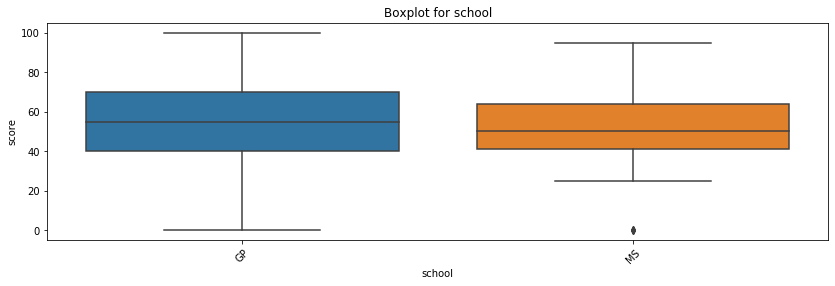

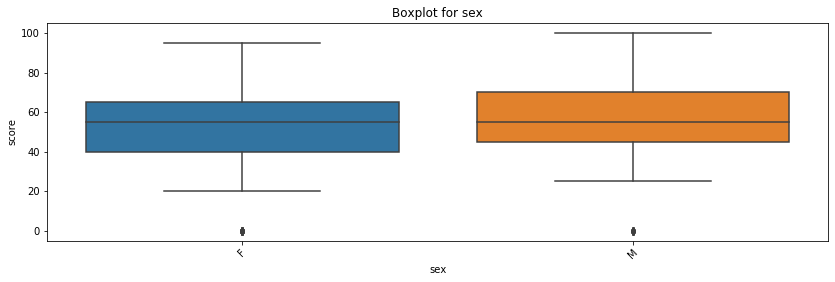

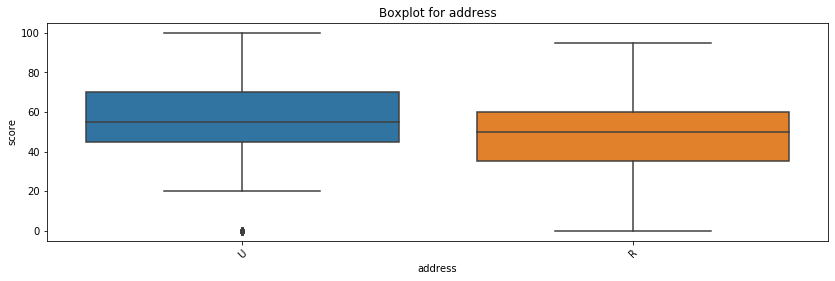

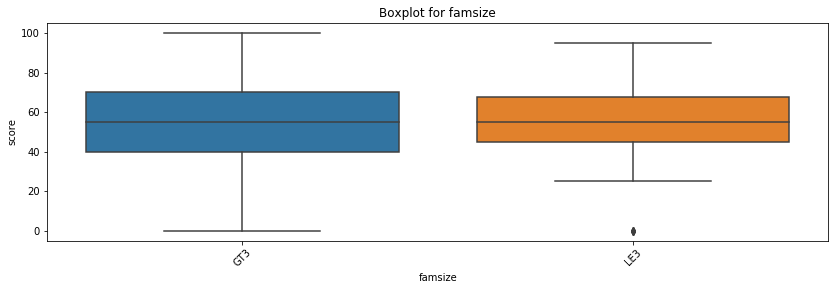

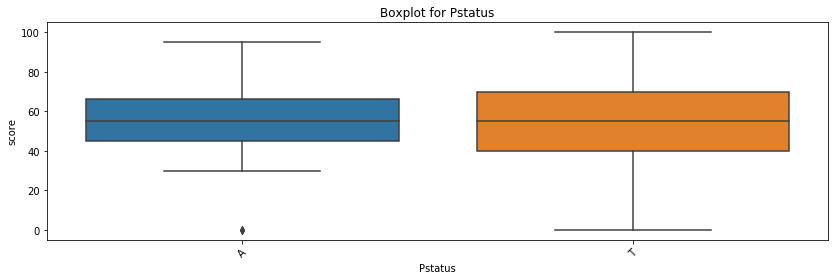

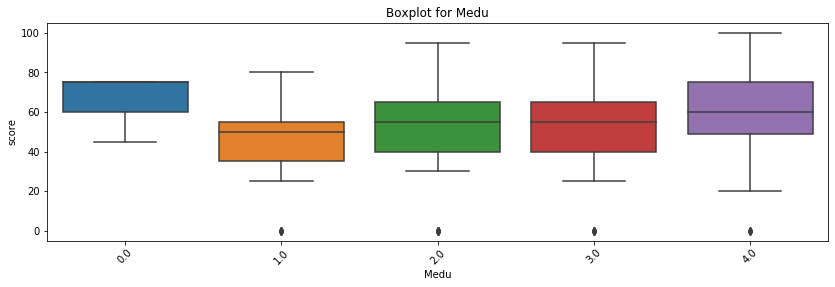

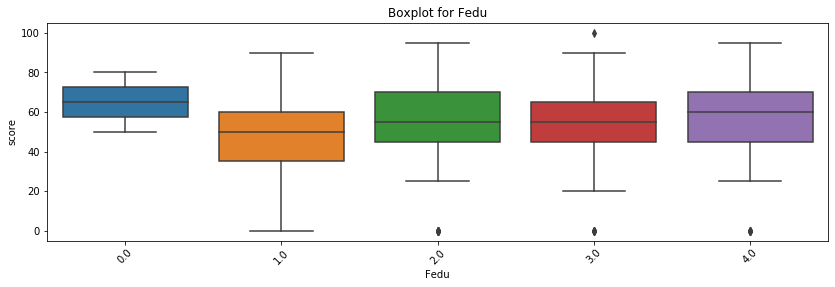

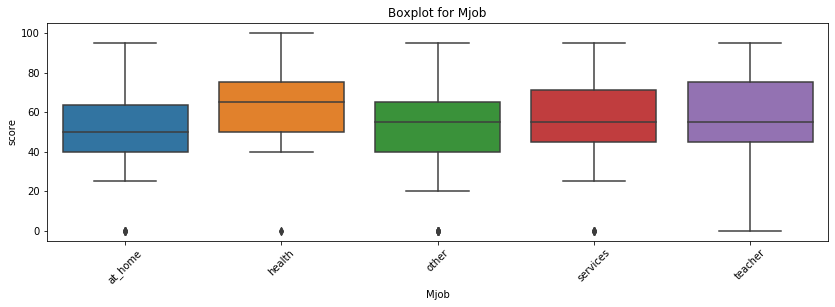

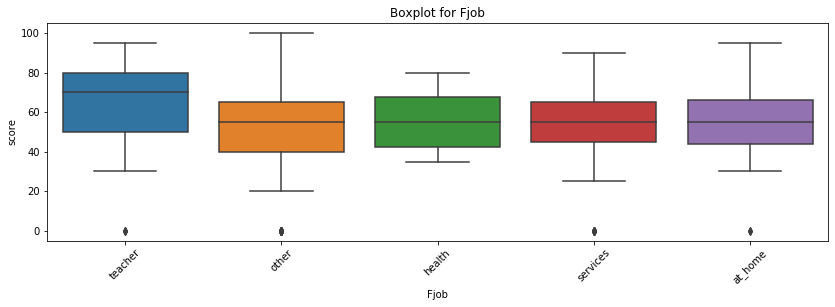

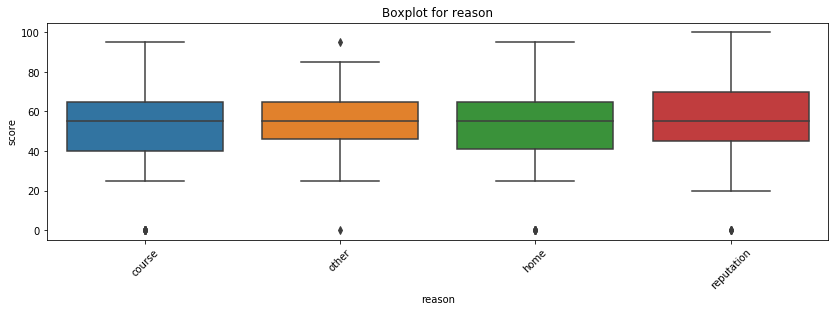

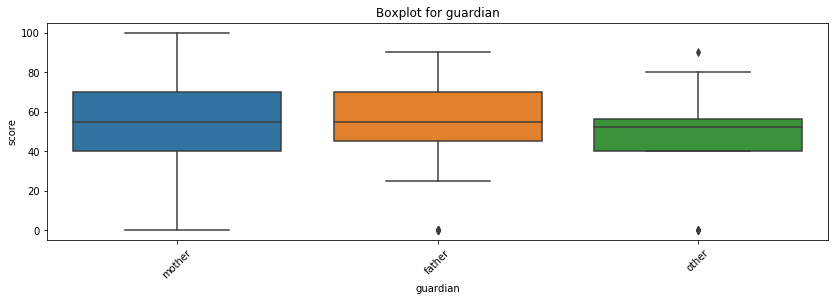

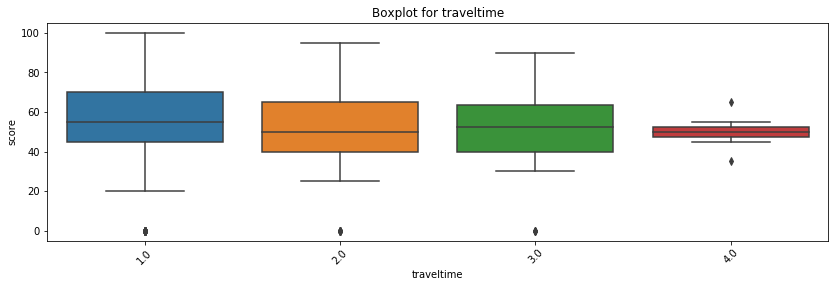

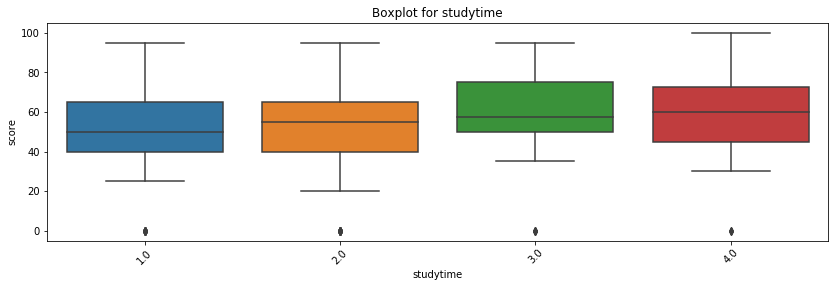

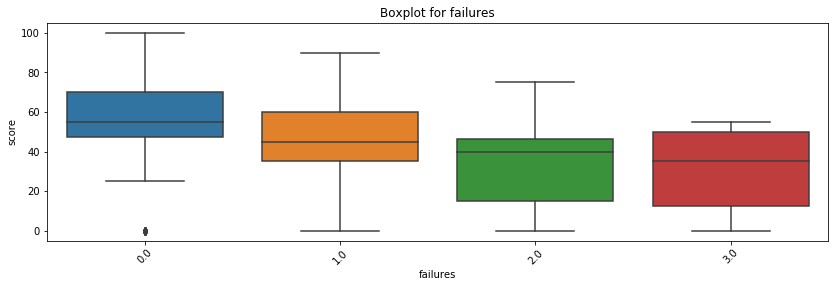

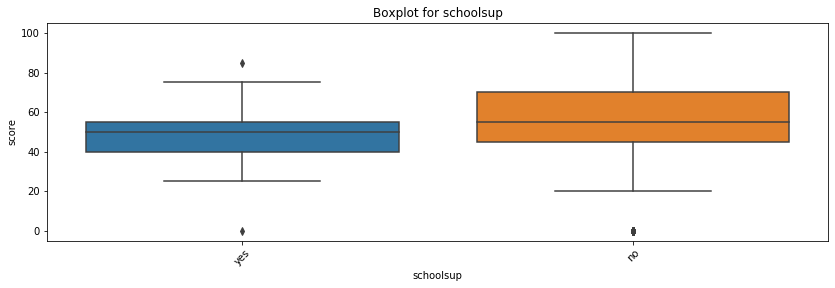

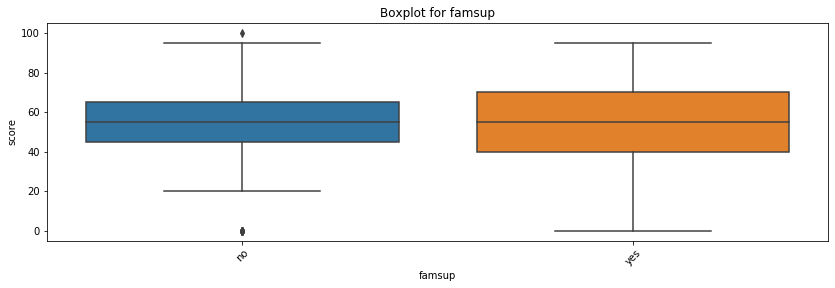

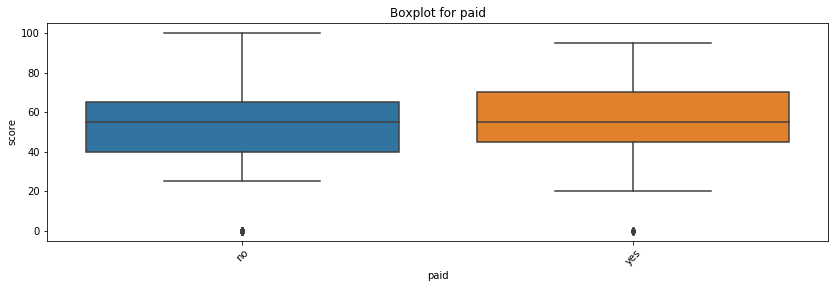

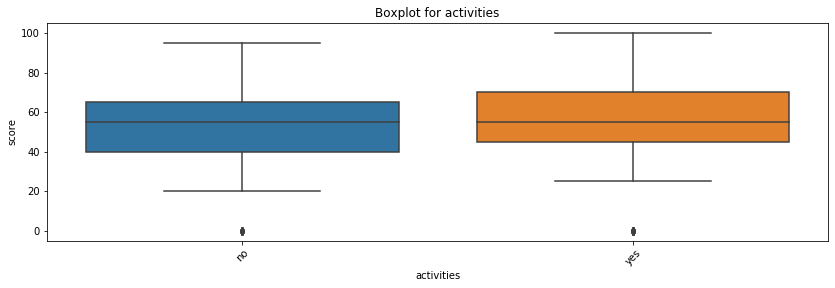

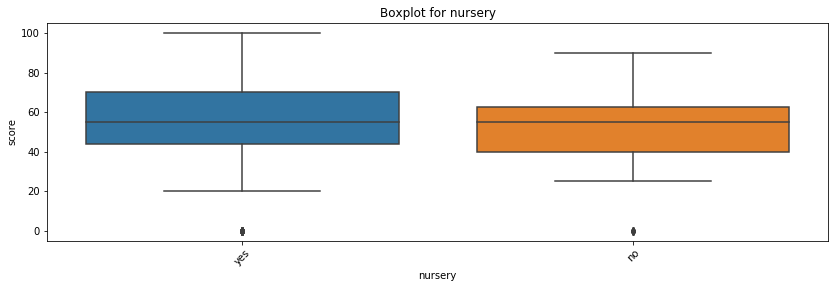

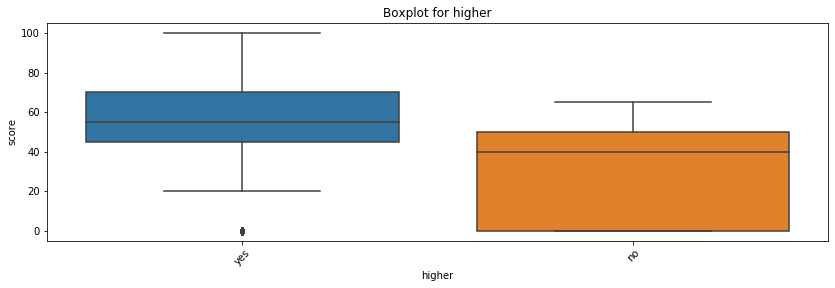

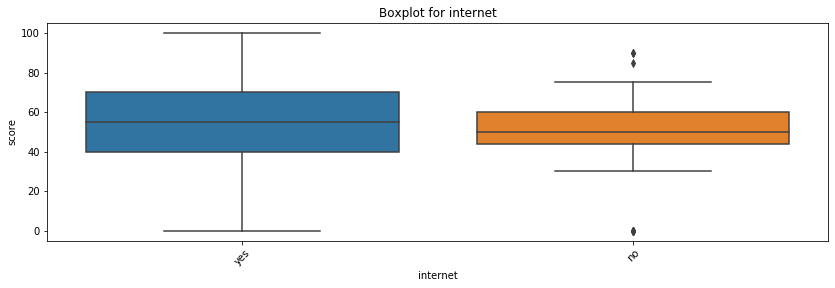

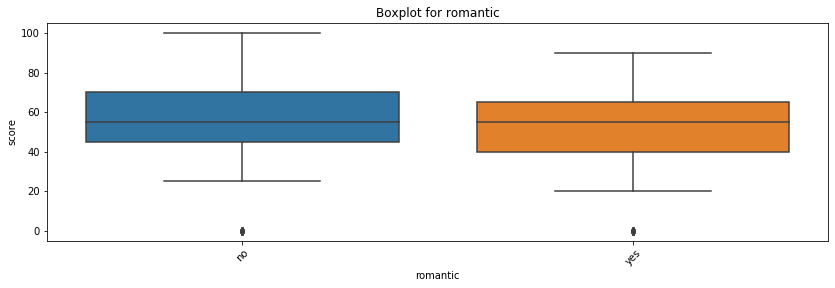

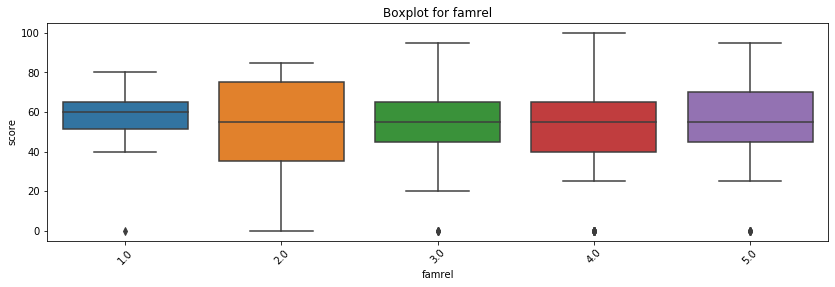

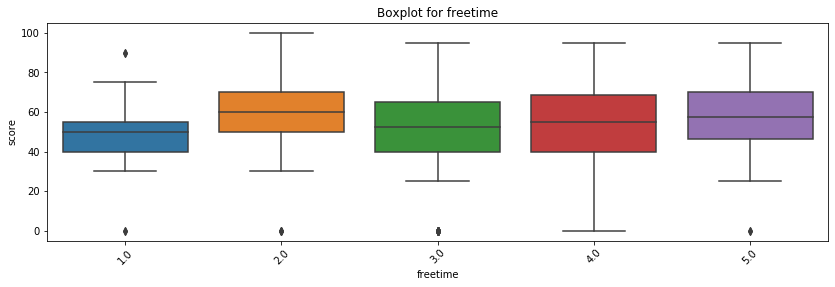

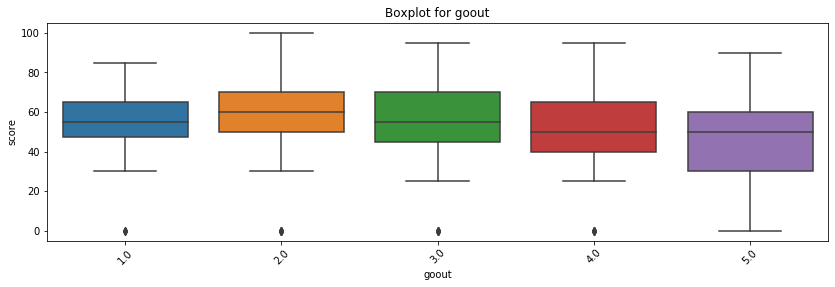

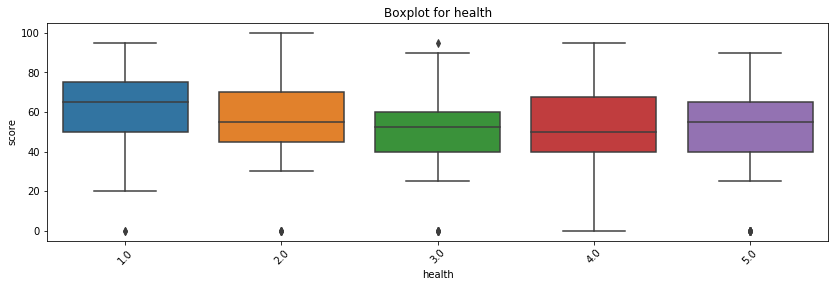

In [158]:
for col in column_list:
    get_boxplot(stud_math, col)

Исходя из графиков, есть большая вероятность, что значимыми столбцами будут: address, Medu, Fedu, Mjob, studytime, failures, schoolsup, paid, higher, goout.

Попробуем построить графики для датафрейма, где оценка по мат-ке не равна 0 (как мы помним таких строчек было 37). Для этого создадим отдельный датафрейм, где оценка не равна 0:

In [159]:
score_notnull = stud_math.loc[stud_math.score != 0]

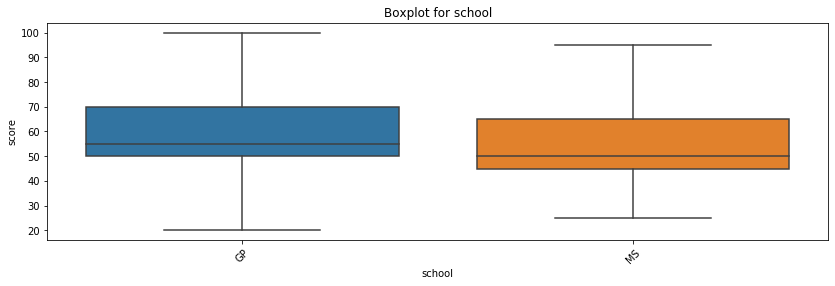

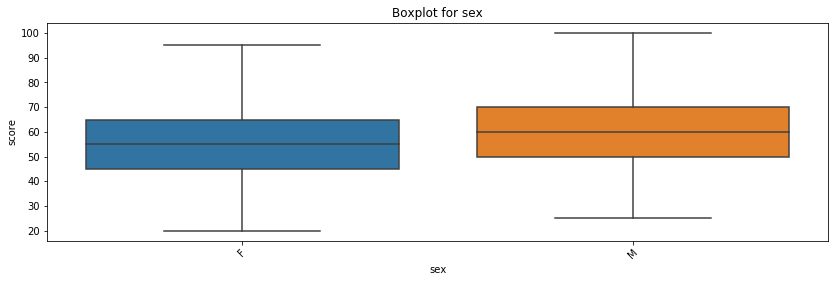

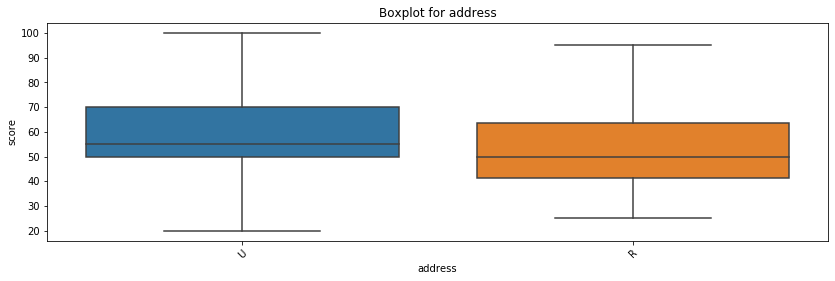

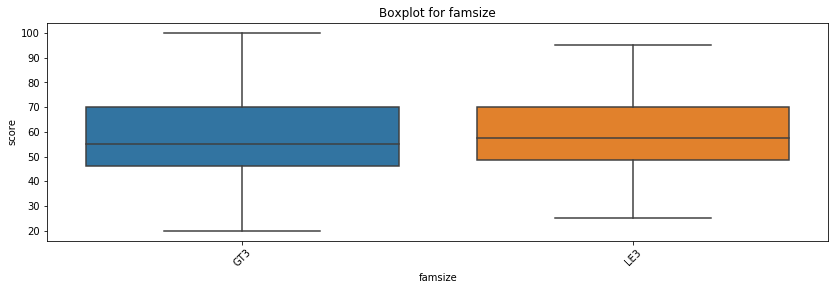

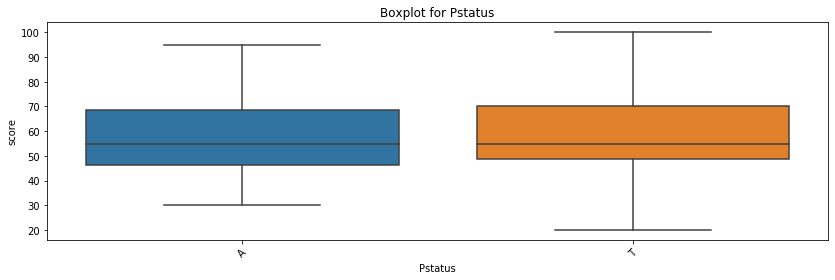

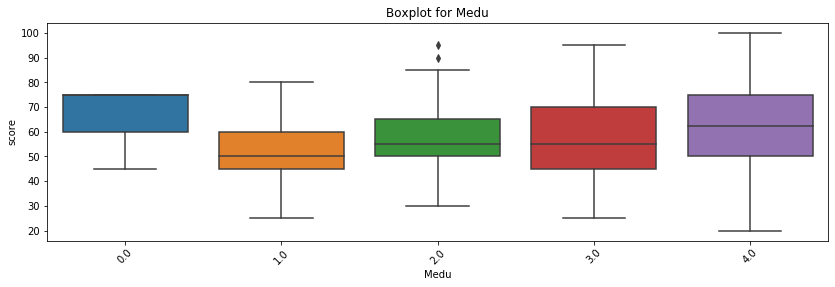

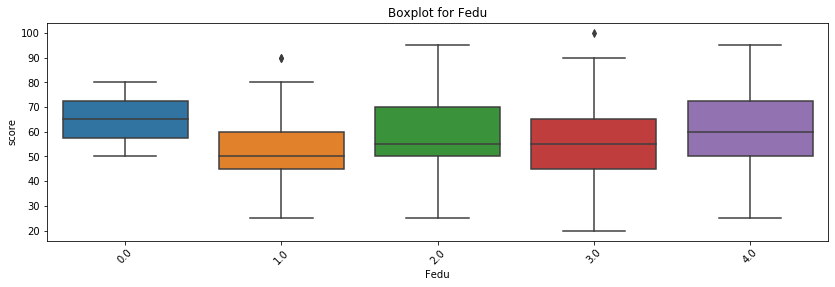

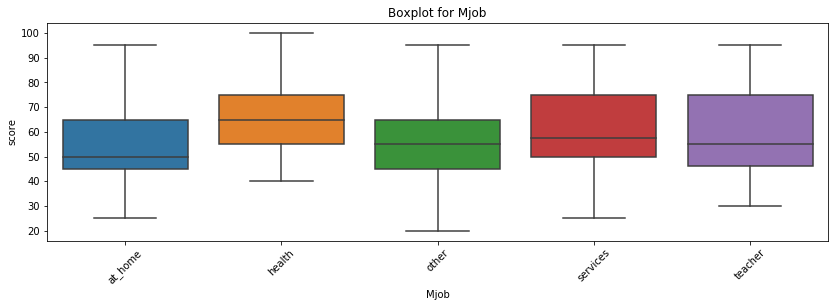

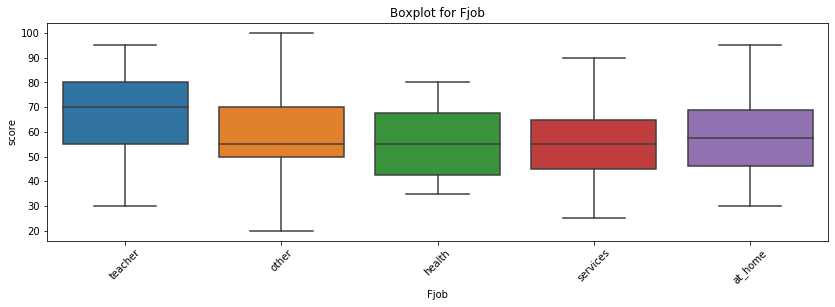

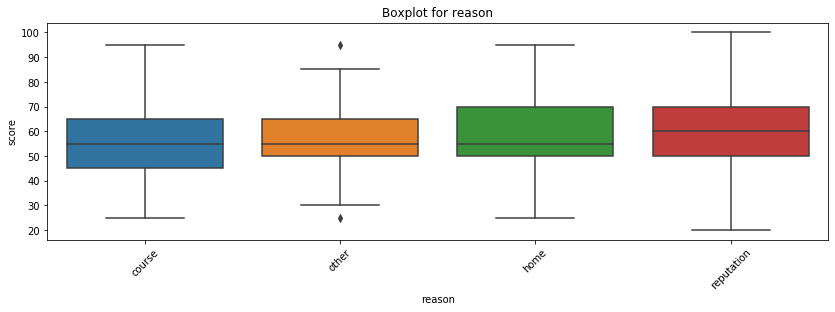

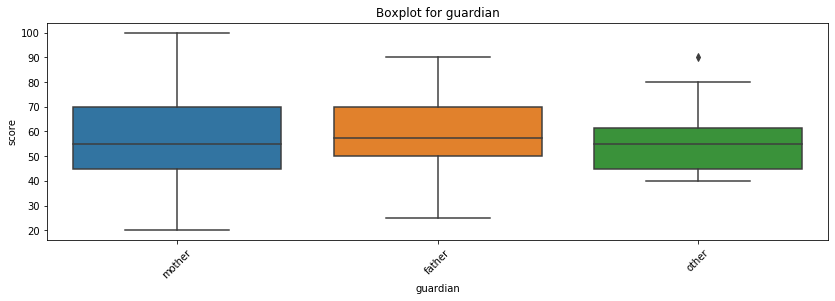

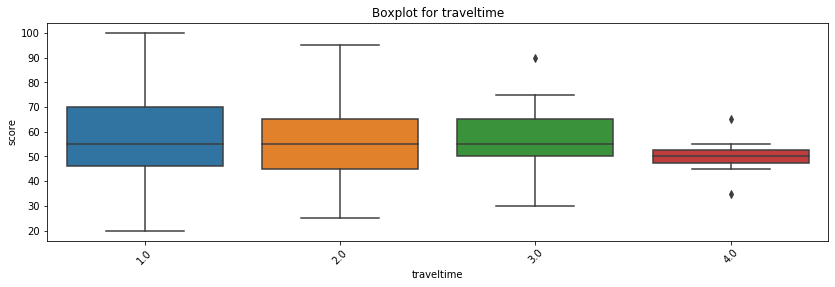

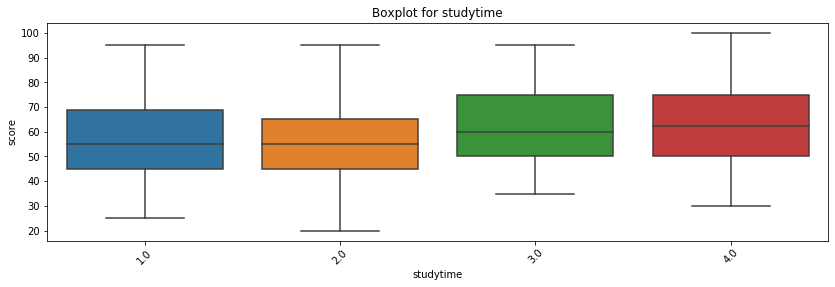

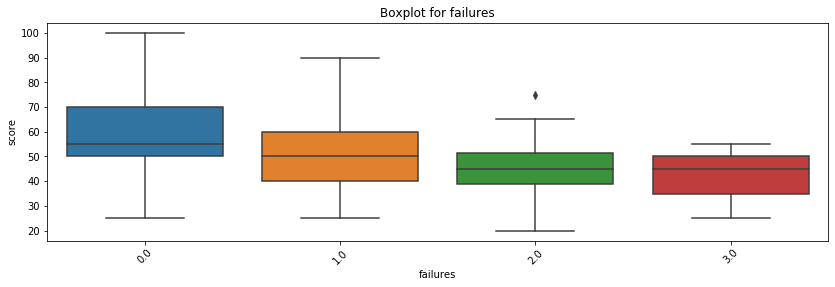

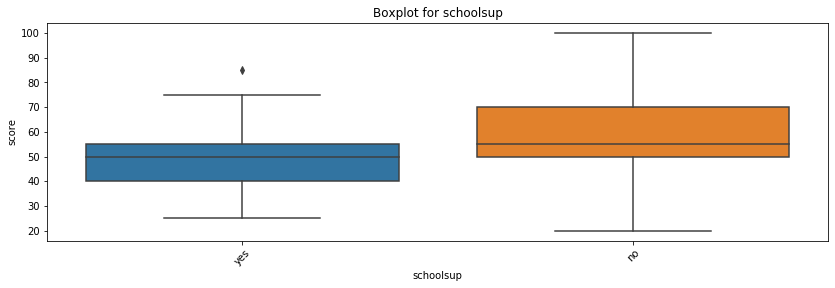

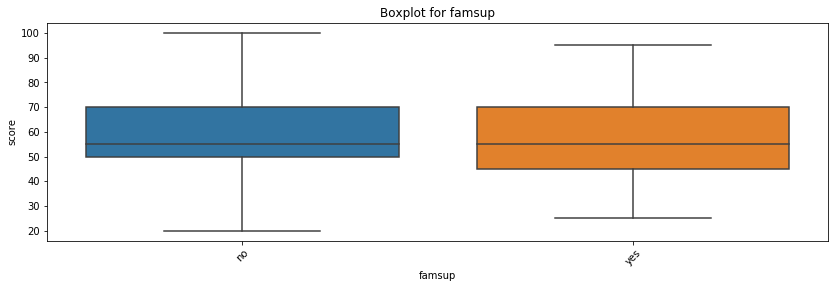

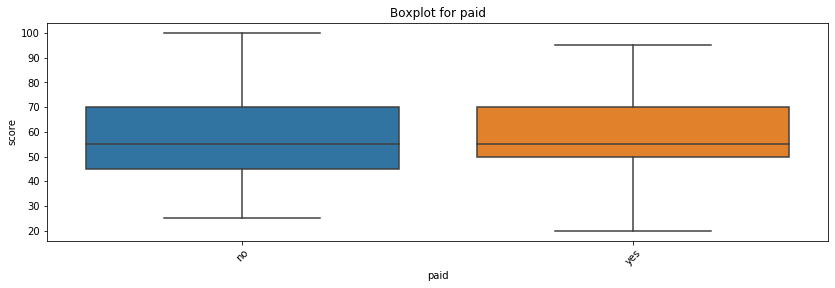

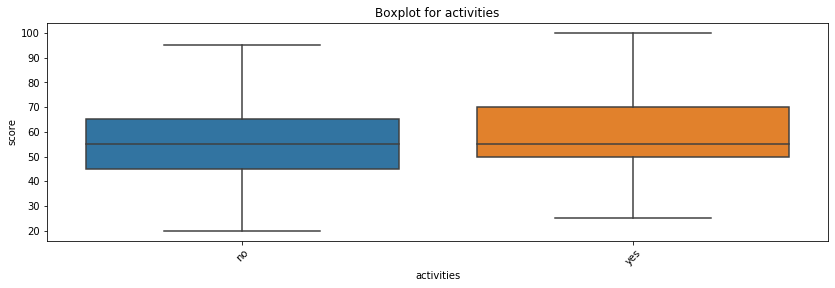

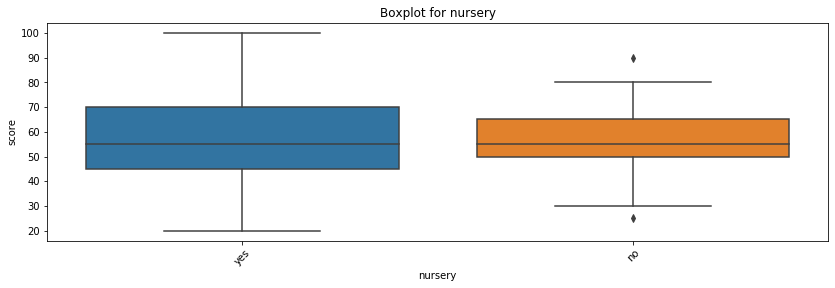

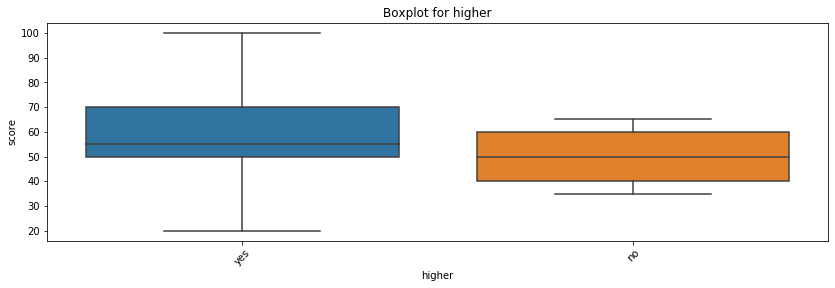

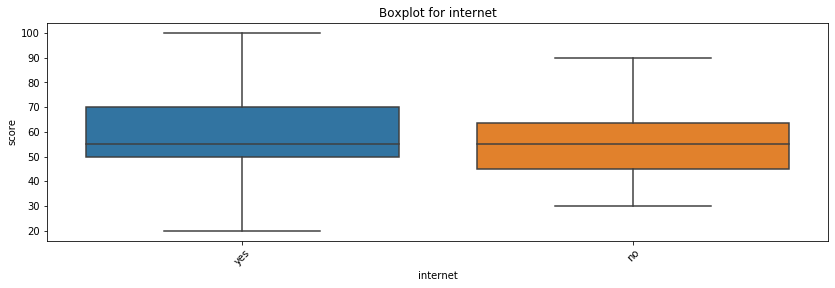

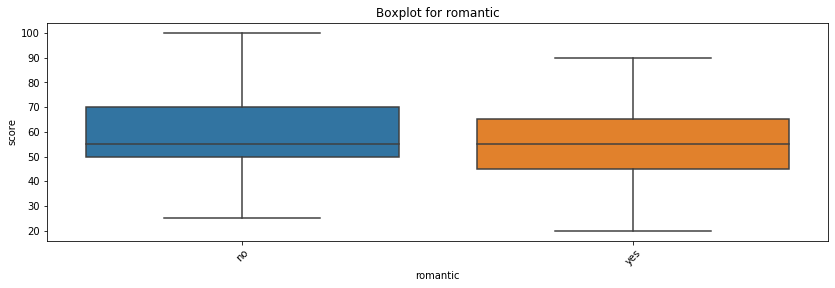

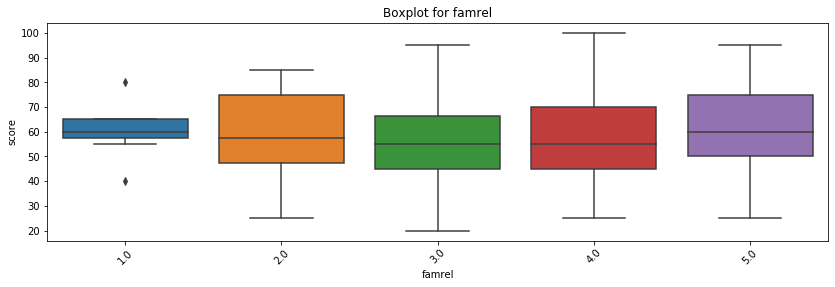

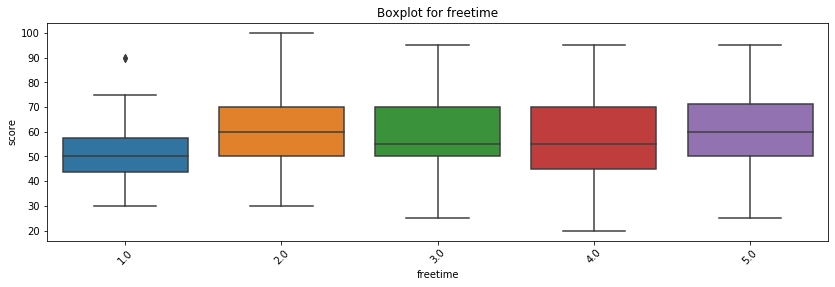

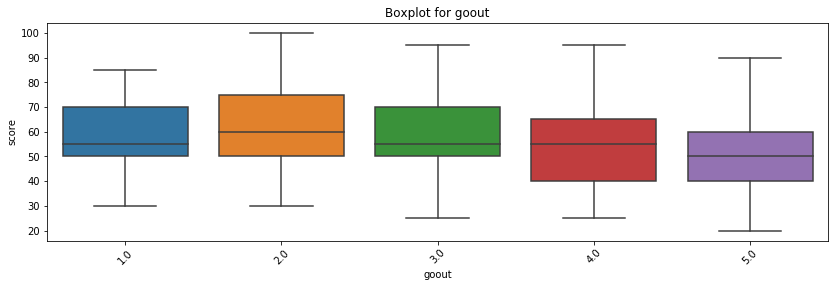

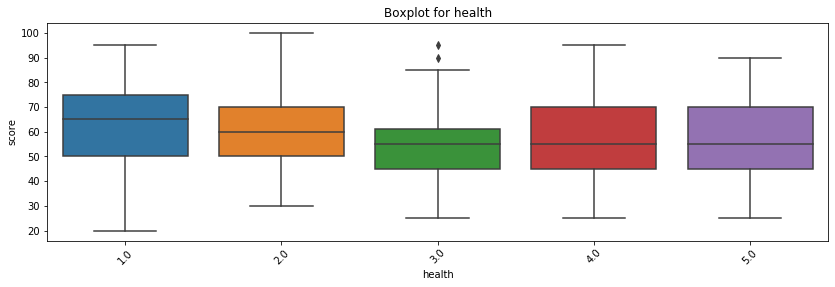

In [160]:
# Create boxplots with dataframe where score is not null.
for col in column_list:
    get_boxplot(score_notnull, col)

По этим боксплотам значимыми столбцами могут быть: address, sex, Medu, Fedu, Mjob, Fjob, studytime, failures, schoolsup, higher, goout. Отличия немного есть.

Теперь посмотрим, есть ли статистическая разница в распределении оценок по номинативным признакам с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы:

In [161]:
for col in column_list:
    get_ttest(stud_math, col)

p_value = 0.016312372902737852
Найдены статистически значимые различия для столбца address
p_value = 0.01085840702809389
Найдены статистически значимые различия для столбца Medu
p_value = 0.03829898235149635
Найдены статистически значимые различия для столбца Fedu
p_value = 0.0422182882401537
Найдены статистически значимые различия для столбца Mjob
p_value = 1.2859920791947437e-05
Найдены статистически значимые различия для столбца failures
p_value = 0.03730375410773825
Найдены статистически значимые различия для столбца paid
p_value = 0.0002316564793996016
Найдены статистически значимые различия для столбца higher
p_value = 0.003179537775232923
Найдены статистически значимые различия для столбца romantic


Проверим теперь отдельно, изменятся ли итоговые столбцы, если оценка не равна 0:

In [162]:
for col in column_list:
    get_ttest(score_notnull, col)

p_value = 0.009045159057778043
Найдены статистически значимые различия для столбца address
p_value = 0.0015156873471464363
Найдены статистически значимые различия для столбца Medu
p_value = 0.02160151602627832
Найдены статистически значимые различия для столбца Fedu
p_value = 0.008830701933413771
Найдены статистически значимые различия для столбца Mjob
p_value = 0.020542592794845535
Найдены статистически значимые различия для столбца Fjob
p_value = 0.024770094862845846
Найдены статистически значимые различия для столбца studytime
p_value = 0.0043589528585128295
Найдены статистически значимые различия для столбца failures
p_value = 6.211758451440155e-06
Найдены статистически значимые различия для столбца schoolsup
p_value = 0.0228836453564188
Найдены статистически значимые различия для столбца goout


Как мы видим пересечение имеется, но всего по 5 столбцам: address, Medu, Fedu, Mjob, failures. 

Столбцы, которые отличаются, все по здравому смыслу влияют на оценку студентов. Заметим также, что во втором тесте p value по общим параметрам получились даже лучше. Итак, возьмем объединие двух получившихся множеств показателей.

### Выводы: 

- все пустые значения были заполнены, данные стали полными.
- выбросы были найдены только в графе "age" (22 года) и "absences" (больше 25), но все значения оставлены из здравого смысла.
- отрицательная корреляция между score и age говорит нам о том, что с возрастом оценка ухудшается, а отрицательная корреляция score c absences - о том, что чем больше пропусков, тем ниже оценка. Оба вывода вполне логичны. 
-  самые важные параметры, которые мы оставим для построения дальнейшей модели - это age, absences, address, Medu, Fedu, Mjob, Fjob, failures, paid, higher, romantic, studytime, schoolsup, goout.